In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import seaborn as sns

path = 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
rc('font', family=font_name)

%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir(r"C:\Users\User\Datamining Project\SkillCraft2")

In [3]:
df = pd.read_csv('범위 변환.csv')
df.head()

Unnamed: 0  GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0           0      52            5  27.0          10.0      3000.0  143.7180   
1           1      55            5  23.0          10.0      5000.0  129.2322   
2           2      56            4  30.0          10.0       200.0   69.9612   
3           3      57            3  19.0          20.0       400.0  107.6016   
4           4      58            3  32.0          10.0       500.0  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  NumberOfPACs  \
0         0.311092         0.019443       0.004859  ...      0.429140   
1         0.292387         0.022962       0.006124  ...      0.381175   
2         0.097447         0.029698       0.003708  ...      0.258929   
3         0.091468         0.018859       0.000947  ...      0.334756   
4         0.100537         0.028968       0.003407  ...      0.209594   

   GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
0        0.032668       0.040867        4.7508          0.019443     0.123599   
1        0.032919       0.042345        4.8434          0.033678     0.105625   
2        0.044647       0.075355        4.0430          0.020417     0.065893   
3        0.029220       0.053735        4.9155          0.017916     0.037719   
4        0.022689       0.062081        9.3740          0.025560     0.103943   

   UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  MaxTimeStamp  
0         0.004168               0.0            0.000000        127448  
1         0.007655               0.0            0.018370         57812  
2         0.005567               0.0            0.016705         95360  
3         0.006602               0.0            0.033947         93852  
4         0.006814               0.0            0.001708         51936  

[5 rows x 22 columns]

In [4]:
df.shape

(3395, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3395 non-null   int64  
 1   GameID              3395 non-null   int64  
 2   LeagueIndex         3395 non-null   int64  
 3   Age                 3340 non-null   float64
 4   HoursPerWeek        3339 non-null   float64
 5   TotalHours          3338 non-null   float64
 6   APM                 3395 non-null   float64
 7   SelectByHotkeys     3395 non-null   float64
 8   AssignToHotkeys     3395 non-null   float64
 9   UniqueHotkeys       3395 non-null   float64
 10  MinimapAttacks      3395 non-null   float64
 11  MinimapRightClicks  3395 non-null   float64
 12  NumberOfPACs        3395 non-null   float64
 13  GapBetweenPACs      3395 non-null   float64
 14  ActionLatency       3395 non-null   float64
 15  ActionsInPAC        3395 non-null   float64
 16  TotalM

In [6]:
df['GameID'] = df['GameID'].astype(str)
GameID_unique = df['GameID'].unique()
print('GameID 종류 개수: ')
for i in range(len(GameID_unique)):
    print(GameID_unique[i])
print('GameID 종류 개수: ' , len(GameID_unique))

GameID 종류 개수: 
52
55
56
57
58
60
61
72
77
81
83
93
97
98
100
102
105
106
118
127
132
138
139
140
141
142
144
149
154
158
160
161
162
163
168
169
171
175
178
180
181
182
184
187
193
194
196
201
203
204
209
210
212
213
215
219
220
223
225
226
228
229
230
234
235
240
244
246
250
251
256
257
260
263
264
265
266
267
268
272
280
281
284
288
290
297
299
301
302
305
312
314
316
318
320
321
329
333
336
338
339
342
350
351
357
361
363
366
371
378
381
383
384
388
389
392
393
394
396
398
400
401
403
407
408
411
418
422
423
424
426
434
435
436
438
439
442
443
444
449
454
455
457
458
464
466
473
475
476
480
490
497
506
508
509
511
512
513
514
517
519
523
525
526
527
529
531
532
535
536
540
542
545
546
547
557
560
568
569
570
572
576
578
581
584
585
588
590
591
600
601
604
607
608
609
611
614
616
621
623
626
628
629
630
631
632
633
636
637
638
643
645
649
650
651
652
654
655
656
664
666
672
674
680
681
683
685
689
691
692
694
699
701
703
704
705
710
711
712
713
716
720
722
723
724
730
731
732
735
736

7844
7847
7848
7849
7851
7853
7855
7858
7863
7865
7867
7869
7870
7881
7883
7884
7885
7886
7887
7888
7889
7893
7898
7900
7906
7909
7913
7917
7918
7919
7921
7922
7923
7925
7926
7927
7934
7935
7939
7945
7946
7955
7956
7957
7958
7959
7960
7962
7964
7967
7968
7969
7970
7971
7974
7975
7976
7978
7979
7980
7985
7986
7988
7989
7990
7991
7993
7997
7998
7999
8002
8004
8005
8006
8007
8017
8018
8019
8020
8023
8024
8026
8027
8033
8038
8039
8041
8042
8043
8047
8048
8050
8051
8052
8055
8062
8063
8065
8066
8068
8073
8076
8078
8079
8085
8090
8095
8096
8098
8104
8106
8109
8114
8116
8117
8119
8125
8126
8129
8134
8135
8137
8138
8140
8145
8146
8147
8151
8152
8155
8159
8160
8167
8173
8174
8176
8182
8184
8188
8196
8198
8202
8206
8207
8208
8210
8213
8217
8218
8221
8222
8223
8224
8225
8226
8227
8229
8236
8239
8244
8245
8246
8248
8258
8262
8272
8276
8283
8284
8285
8288
8294
8295
8296
8300
8303
8305
8306
8313
8314
8316
8317
8322
8329
8331
8332
8333
8334
8335
8338
8341
8348
8349
8350
8351
8353
8354
8355
8358
8360


In [7]:
df.columns

Index(['Unnamed: 0', 'GameID', 'LeagueIndex', 'Age', 'HoursPerWeek',
       'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

In [8]:
check_col = ['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']
check_col

['LeagueIndex',
 'Age',
 'HoursPerWeek',
 'TotalHours',
 'APM',
 'SelectByHotkeys',
 'AssignToHotkeys',
 'UniqueHotkeys',
 'MinimapAttacks',
 'MinimapRightClicks',
 'NumberOfPACs',
 'GapBetweenPACs',
 'ActionLatency',
 'ActionsInPAC',
 'TotalMapExplored',
 'WorkersMade',
 'UniqueUnitsMade',
 'ComplexUnitsMade',
 'ComplexAbilityUsed',
 'MaxTimeStamp']

In [169]:
df[df.duplicated(subset = check_col,keep=False)]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
1401        1401   4064            5  25.0          20.0       700.0  95.5704   
1409        1409   4075            5  25.0          20.0       700.0  95.5704   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  NumberOfPACs  \
1401         0.167685         0.029345       0.005239  ...      0.285065   
1409         0.167685         0.029345       0.005239  ...      0.285065   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
1401        0.035336       0.063309        5.1618          0.019913   
1409        0.035336       0.063309        5.1618          0.019913   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
1401     0.064978         0.005239          0.029345            0.045065   
1409     0.064978         0.005239          0.029345            0.045065   

      MaxTimeStamp  
1401         84444  
1409         84444  

[2 rows x 22 columns]

In [170]:
df.describe()

Unnamed: 0  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count  3395.000000  3395.000000  3340.000000   3339.000000     3338.000000   
mean   1697.000000     4.184094    21.647904     15.910752      960.421809   
std     980.196409     1.517327     4.206341     11.962912    17318.133922   
min       0.000000     1.000000    16.000000      0.000000        3.000000   
25%     848.500000     3.000000    19.000000      8.000000      300.000000   
50%    1697.000000     4.000000    21.000000     12.000000      500.000000   
75%    2545.500000     5.000000    24.000000     20.000000      800.000000   
max    3394.000000     8.000000    44.000000    168.000000  1000000.000000   

               APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  \
count  3395.000000      3395.000000      3395.000000    3395.000000   
mean    117.046947         0.380432         0.033061       0.005198   
std      51.945291         0.467672         0.019907       0.003399   
min      22.059600         0.000000         0.000000       0.000000   
25%      79.900200         0.111317         0.018074       0.002898   
50%     108.010200         0.221207         0.031202       0.004726   
75%     142.790400         0.454233         0.044147       0.006961   
max     389.831400         3.813320         0.155069       0.029874   

       MinimapAttacks  ...  NumberOfPACs  GapBetweenPACs  ActionLatency  \
count     3395.000000  ...   3395.000000     3395.000000    3395.000000   
mean         0.008700  ...      0.306466        0.040362       0.063739   
std          0.014680  ...      0.087818        0.017154       0.019239   
min          0.000000  ...      0.060091        0.006667       0.024094   
25%          0.000000  ...      0.243703        0.028958       0.050447   
50%          0.003531  ...      0.300495        0.036723       0.060932   
75%          0.010519  ...      0.356399        0.048291       0.073681   
max          0.267212  ...      0.705402        0.237143       0.176372   

       ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
count   3395.000000       3395.000000  3395.000000      3395.000000   
mean       5.272988          0.025001     0.091304         0.007482   
std        1.494835          0.007664     0.045932         0.002185   
min        2.038900          0.008080     0.006814         0.001743   
25%        4.272850          0.019856     0.060442         0.006000   
50%        5.095500          0.023853     0.080114         0.007275   
75%        6.033600          0.028785     0.111391         0.008726   
max       18.558100          0.073627     0.455713         0.017864   

       ComplexUnitsMade  ComplexAbilityUsed   MaxTimeStamp  
count       3395.000000         3395.000000    3395.000000  
mean           0.005260            0.012556   83598.229161  
std            0.009832            0.023474   33497.667966  
min            0.000000            0.000000   25224.000000  
25%            0.000000            0.000000   60090.000000  
50%            0.000000            0.001797   81012.000000  
75%            0.007571            0.016051  102074.000000  
max            0.079851            0.272907  388032.000000  

[8 rows x 21 columns]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3395 non-null   int64  
 1   GameID              3395 non-null   object 
 2   LeagueIndex         3395 non-null   int64  
 3   Age                 3340 non-null   float64
 4   HoursPerWeek        3339 non-null   float64
 5   TotalHours          3338 non-null   float64
 6   APM                 3395 non-null   float64
 7   SelectByHotkeys     3395 non-null   float64
 8   AssignToHotkeys     3395 non-null   float64
 9   UniqueHotkeys       3395 non-null   float64
 10  MinimapAttacks      3395 non-null   float64
 11  MinimapRightClicks  3395 non-null   float64
 12  NumberOfPACs        3395 non-null   float64
 13  GapBetweenPACs      3395 non-null   float64
 14  ActionLatency       3395 non-null   float64
 15  ActionsInPAC        3395 non-null   float64
 16  TotalM

In [10]:
hist_df = df.drop(['Unnamed: 0', 'GameID'], axis=1)
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3395 non-null   int64  
 1   Age                 3340 non-null   float64
 2   HoursPerWeek        3339 non-null   float64
 3   TotalHours          3338 non-null   float64
 4   APM                 3395 non-null   float64
 5   SelectByHotkeys     3395 non-null   float64
 6   AssignToHotkeys     3395 non-null   float64
 7   UniqueHotkeys       3395 non-null   float64
 8   MinimapAttacks      3395 non-null   float64
 9   MinimapRightClicks  3395 non-null   float64
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   float64
 12  ActionLatency       3395 non-null   float64
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   float64
 16  Unique

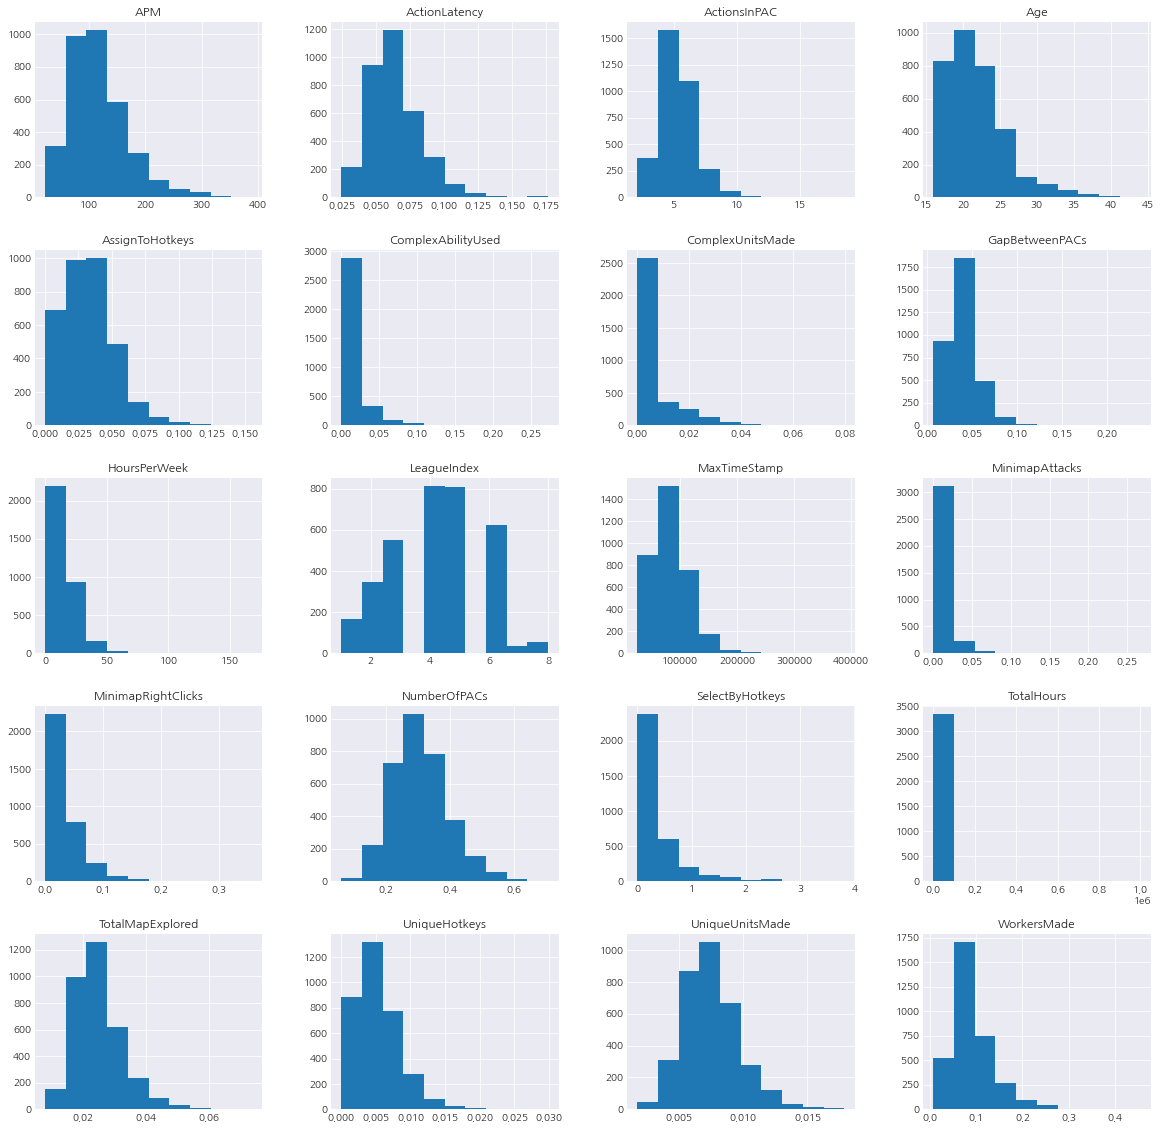

In [11]:
p = hist_df.hist(figsize = (20,20))

In [173]:
df.skew().sort_values(ascending=False)

TotalHours            57.565349
MinimapAttacks         4.819161
ComplexAbilityUsed     3.778854
SelectByHotkeys        2.965329
HoursPerWeek           2.673122
MinimapRightClicks     2.563817
ComplexUnitsMade       2.301405
GapBetweenPACs         1.908283
WorkersMade            1.661405
ActionsInPAC           1.599049
UniqueHotkeys          1.224374
APM                    1.204450
TotalMapExplored       1.184696
MaxTimeStamp           1.164514
Age                    1.152388
ActionLatency          1.151655
AssignToHotkeys        1.141308
UniqueUnitsMade        0.700695
NumberOfPACs           0.550379
Unnamed: 0             0.000000
GameID                -0.009147
LeagueIndex           -0.163358
dtype: float64

TotalHours가 왜도가 아주 크다.

In [174]:
df.kurt().sort_values(ascending=False)

TotalHours            3321.688498
MinimapAttacks          45.541630
ComplexAbilityUsed      21.542153
HoursPerWeek            16.736863
MinimapRightClicks      11.582369
SelectByHotkeys         11.325526
GapBetweenPACs           9.315243
ActionsInPAC             7.329711
ComplexUnitsMade         6.109062
WorkersMade              4.624404
MaxTimeStamp             4.192870
UniqueHotkeys            3.543711
AssignToHotkeys          2.890468
TotalMapExplored         2.663750
ActionLatency            2.635484
APM                      2.252926
Age                      2.007254
UniqueUnitsMade          1.163659
NumberOfPACs             0.620328
LeagueIndex             -0.378682
GameID                  -1.146723
Unnamed: 0              -1.200000
dtype: float64

TotalHours가 첨도가 아주 크며, MinimapAttacks, ComplexAbiliyUsed, HoursPerWeek, MinimapRightClicks 순으로 첨도가 크다. 
따라서 관측치들이 집중적으로 모여있음을 알 수 있다.

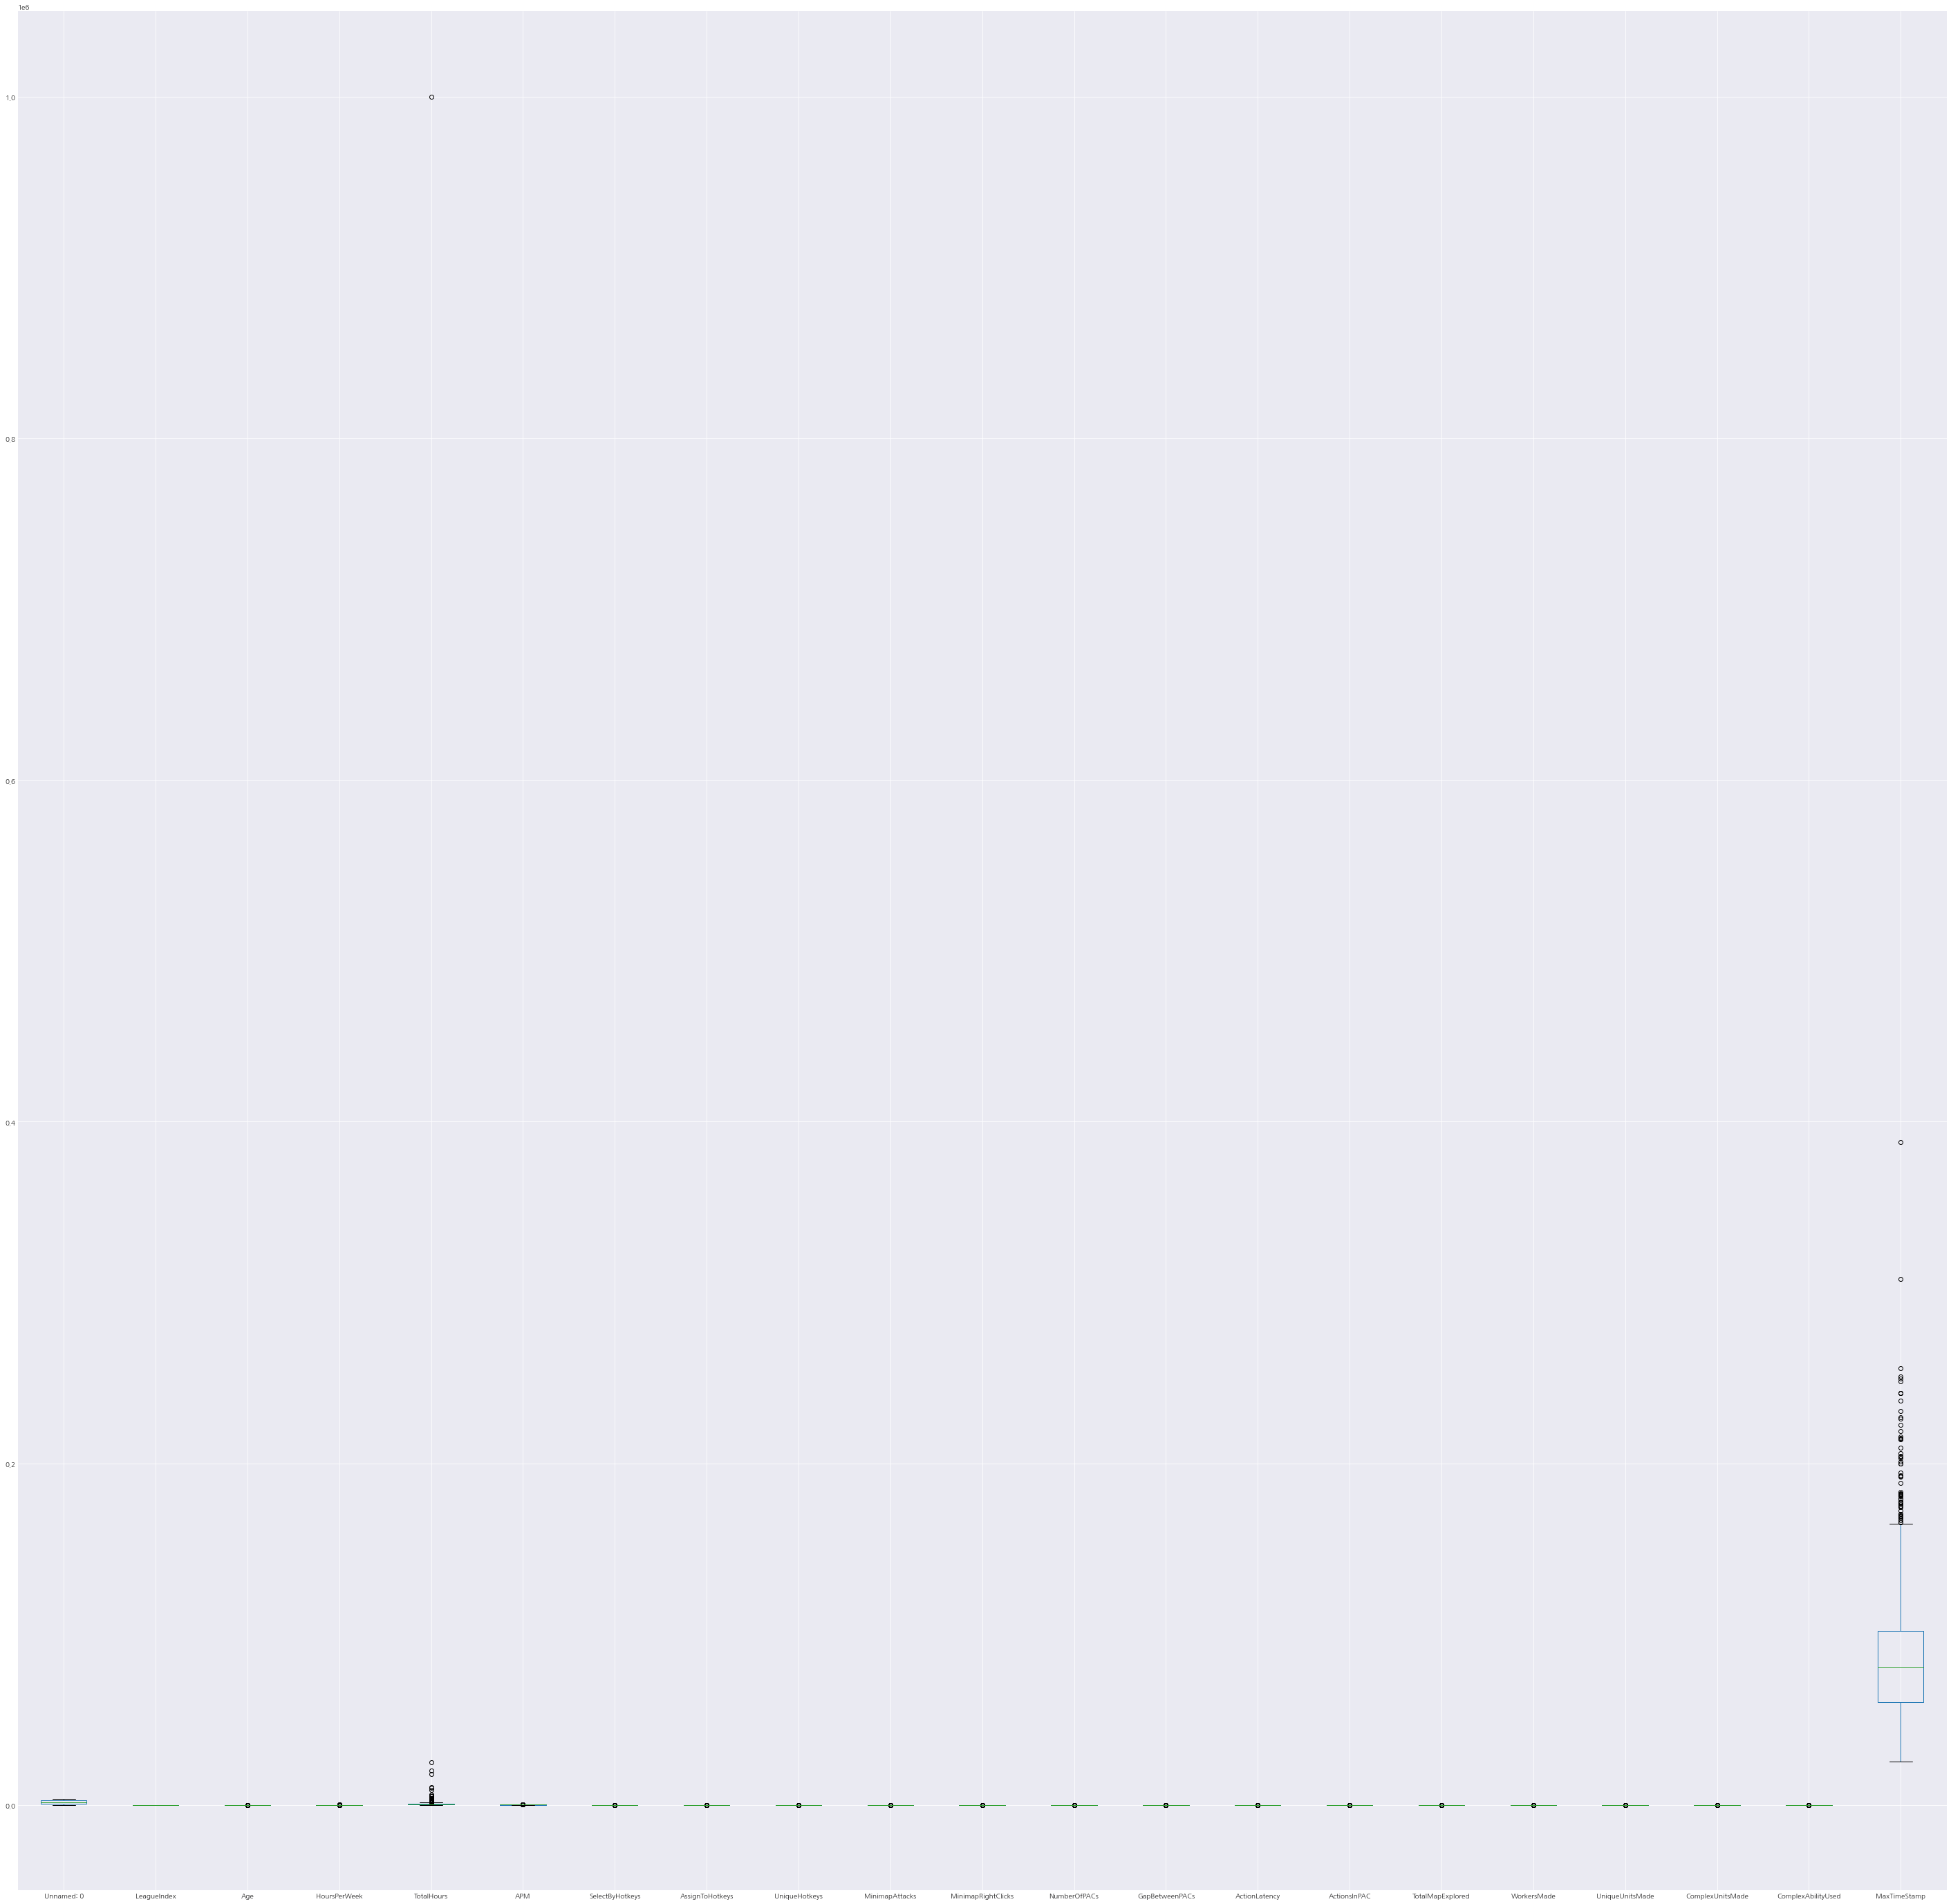

In [175]:
p = df.boxplot(figsize = (50,50))

In [176]:
df.columns

Index(['Unnamed: 0', 'GameID', 'LeagueIndex', 'Age', 'HoursPerWeek',
       'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

### 변수별로 boxplot 확인 - 왜도 큰 것 부터

West et al(1995)의 정규분포 기준 : |왜도|<3, |첨도|<8

TotalHours - Skew : 57.565349

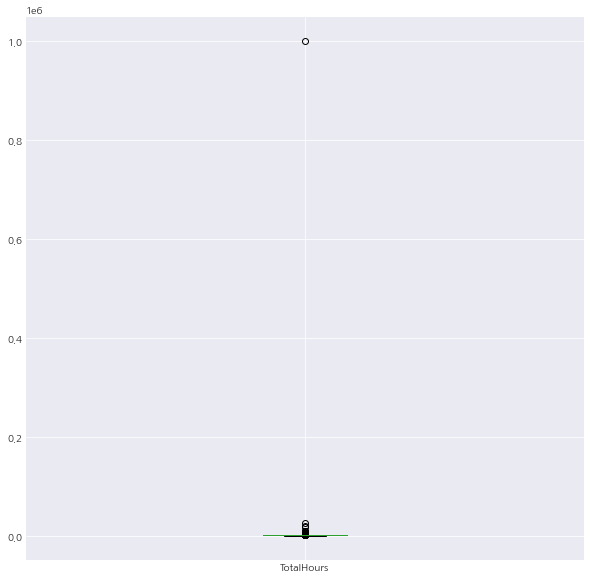

In [177]:
df[['TotalHours']].boxplot(figsize = (10,10))

In [272]:
df[df['TotalHours']==0]

Empty DataFrame
Columns: [Unnamed: 0, GameID, LeagueIndex, Age, HoursPerWeek, TotalHours, APM, SelectByHotkeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, NumberOfPACs, GapBetweenPACs, ActionLatency, ActionsInPAC, TotalMapExplored, WorkersMade, UniqueUnitsMade, ComplexUnitsMade, ComplexAbilityUsed, MaxTimeStamp]
Index: []

[0 rows x 22 columns]

In [274]:
df[df['HoursPerWeek'] == 0]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
1037        1037   2985            6  16.0           0.0       365.0  86.1174   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  NumberOfPACs  \
1037         0.035091         0.029243        0.00877  ...      0.225169   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
1037        0.054316       0.066026        6.1299          0.032167   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
1037      0.16961         0.011697               0.0                 0.0   

      MaxTimeStamp  
1037         30264  

[1 rows x 22 columns]

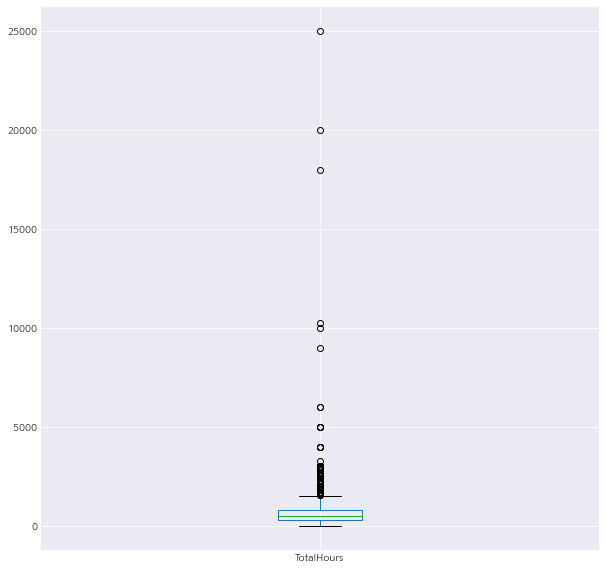

In [275]:
df_cut_max = df[(df['TotalHours'] != 1000000) & (df['TotalHours'] != 0) & (df['HoursPerWeek'] != 0)]
df_cut_max[['TotalHours']].boxplot(figsize = (10,10))

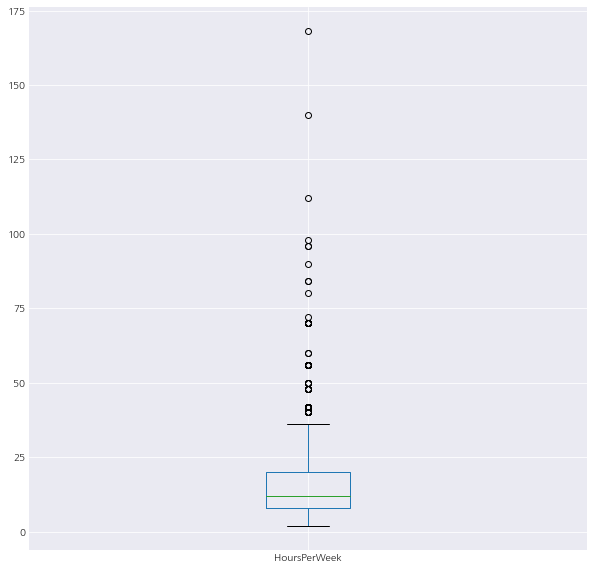

In [280]:
df_cut_max[['HoursPerWeek']].boxplot(figsize = (10,10))

In [276]:
df_cut_max

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours  \
0              0     52            5  27.0          10.0      3000.0   
1              1     55            5  23.0          10.0      5000.0   
2              2     56            4  30.0          10.0       200.0   
3              3     57            3  19.0          20.0       400.0   
4              4     58            3  32.0          10.0       500.0   
...          ...    ...          ...   ...           ...         ...   
3390        3390  10089            8   NaN           NaN         NaN   
3391        3391  10090            8   NaN           NaN         NaN   
3392        3392  10092            8   NaN           NaN         NaN   
3393        3393  10094            8   NaN           NaN         NaN   
3394        3394  10095            8   NaN           NaN         NaN   

           APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  \
0     143.7180         0.311092         0.019443       0.004859  ...   
1     129.2322         0.292387         0.022962       0.006124  ...   
2      69.9612         0.097447         0.029698       0.003708  ...   
3     107.6016         0.091468         0.018859       0.000947  ...   
4     122.8908         0.100537         0.028968       0.003407  ...   
...        ...              ...              ...            ...  ...   
3390  259.6296         1.807640         0.065752       0.009701  ...   
3391  314.6700         2.481818         0.102410       0.021789  ...   
3392  299.4282         2.508180         0.076129       0.009516  ...   
3393  375.8664         3.224577         0.052592       0.008222  ...   
3394  348.3576         2.642161         0.071789       0.003301  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.429140        0.032668       0.040867        4.7508   
1         0.381175        0.032919       0.042345        4.8434   
2         0.258929        0.044647       0.075355        4.0430   
3         0.334756        0.029220       0.053735        4.9155   
4         0.209594        0.022689       0.062081        9.3740   
...            ...             ...            ...           ...   
3390      0.403135        0.018606       0.042834        6.2754   
3391      0.376957        0.014302       0.036116        7.1965   
3392      0.392880        0.012403       0.039516        6.3979   
3393      0.384583        0.011691       0.034855        7.9615   
3394      0.492620        0.020054       0.033514        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168          0.000000   
1             0.033678     0.105625         0.007655          0.000000   
2             0.020417     0.065893         0.005567          0.000000   
3             0.017916     0.037719         0.006602          0.000000   
4             0.025560     0.103943         0.006814          0.000000   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390          0.000000   
3391          0.034863     0.069726         0.008717          0.000000   
3392          0.025830     0.111475         0.005434          0.000000   
3393          0.024653     0.054236         0.009861          0.000000   
3394          0.022279     0.138626         0.005779          0.040433   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.018370         57812  
2               0.016705         95360  
3               0.033947         93852  
4               0.001708         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.055880         53848  
3394            0.079215        107252  

[3393 rows x 22 columns]

In [277]:
df_cut_max['TotalHours'].describe()

count     3336.000000
mean       661.127998
std        856.461839
min          3.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      25000.000000
Name: TotalHours, dtype: float64

In [278]:
df_cut_max = df_cut_max.drop('Unnamed: 0', axis=1)
df_cut_max

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0          10.0      3000.0  143.7180   
1        55            5  23.0          10.0      5000.0  129.2322   
2        56            4  30.0          10.0       200.0   69.9612   
3        57            3  19.0          20.0       400.0  107.6016   
4        58            3  32.0          10.0       500.0  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.429140        0.032668       0.040867        4.7508   
1         0.381175        0.032919       0.042345        4.8434   
2         0.258929        0.044647       0.075355        4.0430   
3         0.334756        0.029220       0.053735        4.9155   
4         0.209594        0.022689       0.062081        9.3740   
...            ...             ...            ...           ...   
3390      0.403135        0.018606       0.042834        6.2754   
3391      0.376957        0.014302       0.036116        7.1965   
3392      0.392880        0.012403       0.039516        6.3979   
3393      0.384583        0.011691       0.034855        7.9615   
3394      0.492620        0.020054       0.033514        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168          0.000000   
1             0.033678     0.105625         0.007655          0.000000   
2             0.020417     0.065893         0.005567          0.000000   
3             0.017916     0.037719         0.006602          0.000000   
4             0.025560     0.103943         0.006814          0.000000   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390          0.000000   
3391          0.034863     0.069726         0.008717          0.000000   
3392          0.025830     0.111475         0.005434          0.000000   
3393          0.024653     0.054236         0.009861          0.000000   
3394          0.022279     0.138626         0.005779          0.040433   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.018370         57812  
2               0.016705         95360  
3               0.033947         93852  
4               0.001708         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.055880         53848  
3394            0.079215        107252  

[3393 rows x 21 columns]

In [279]:
df_cut_max.to_csv('Hours이상치제거.csv', index=False)

Q3(75%)가 800이고, max값이 1000000이므로 매우 이상치임
80%, 90%, 95%, 99% 값 확인

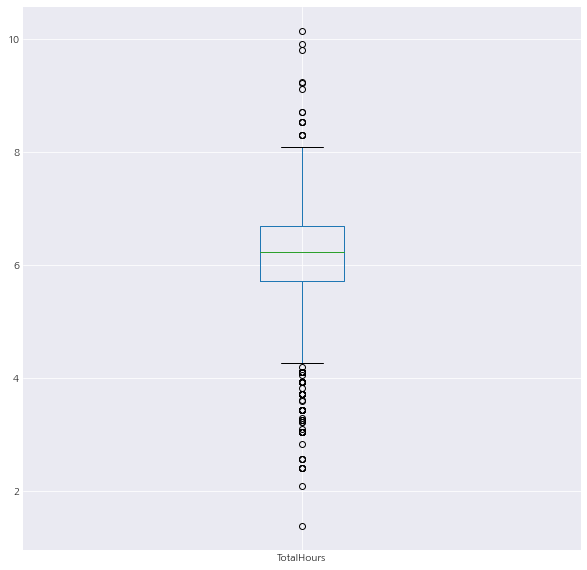

In [255]:
np.log1p(df_cut_max[['TotalHours']]).boxplot(figsize = (10,10))
#df_cut_max[['TotalHours']].boxplot(figsize = (10,10))

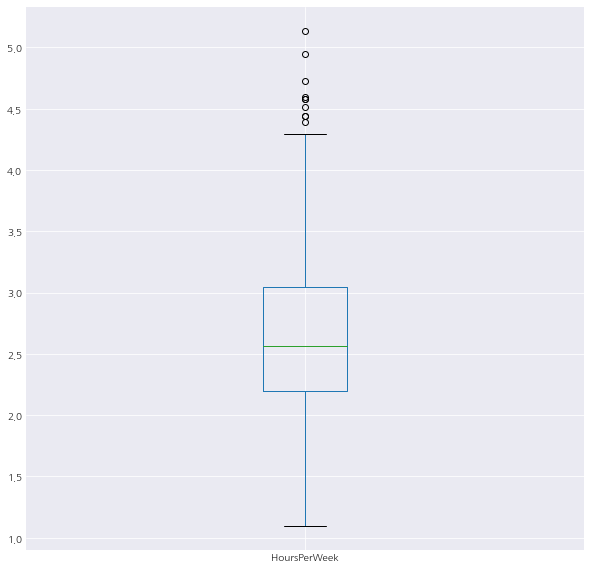

In [281]:
np.log1p(df_cut_max[['HoursPerWeek']]).boxplot(figsize = (10,10))
#df_cut_max[['TotalHours']].boxplot(figsize = (10,10))

In [294]:
df_log = df_cut_max
df_log['TotalHours'] = np.log1p(df_cut_max['TotalHours'])
df_log['HoursPerWeek'] = np.log1p(df_cut_max['HoursPerWeek'])
df_log

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0      1.223156    2.197969  143.7180   
1        55            5  23.0      1.223156    2.253121  129.2322   
2        56            4  30.0      1.223156    1.841074   69.9612   
3        57            3  19.0      1.397363    1.945047  107.6016   
4        58            3  32.0      1.223156    1.976385  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.429140        0.032668       0.040867        4.7508   
1         0.381175        0.032919       0.042345        4.8434   
2         0.258929        0.044647       0.075355        4.0430   
3         0.334756        0.029220       0.053735        4.9155   
4         0.209594        0.022689       0.062081        9.3740   
...            ...             ...            ...           ...   
3390      0.403135        0.018606       0.042834        6.2754   
3391      0.376957        0.014302       0.036116        7.1965   
3392      0.392880        0.012403       0.039516        6.3979   
3393      0.384583        0.011691       0.034855        7.9615   
3394      0.492620        0.020054       0.033514        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168               0.0   
1             0.033678     0.105625         0.007655               0.0   
2             0.020417     0.065893         0.005567               0.0   
3             0.017916     0.037719         0.006602               0.0   
4             0.025560     0.103943         0.006814               0.0   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390               0.0   
3391          0.034863     0.069726         0.008717               0.0   
3392          0.025830     0.111475         0.005434               0.0   
3393          0.024653     0.054236         0.009861               0.0   
3394          0.022279     0.138626         0.005779               1.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.018370         57812  
2               0.016705         95360  
3               0.033947         93852  
4               0.001708         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.055880         53848  
3394            0.079215        107252  

[3393 rows x 21 columns]

In [284]:
#df_log = df_log.drop('Unnamed: 0', axis=1)
df_log.to_csv('Hours이상치제거_log변환.csv', index = False)

## LeagueIndex 7의 Hours 평균들로 결측치 대체

In [ ]:
df_log = 

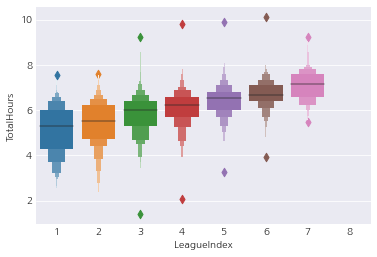

In [262]:
sns.boxenplot(x='LeagueIndex', y='TotalHours', data= df_log)
plt.show()
#np.log1p(df_cut_max[['TotalHours']]).boxplot(figsize = (10,10))

In [178]:
df[['TotalHours']].quantile([0.75, 0.8, 0.9, 0.95, 0.99])

TotalHours
0.75       800.0
0.80       900.0
0.90      1200.0
0.95      1566.0
0.99      2520.0

99%까지의 값도 1,000,000와 차이가 심하므로, 99%까지 자르거나, 95%까지 자르거나, 아니면 max값만 제거하거나 하면 될듯

MinimapAttacks - Skew : 4.819161

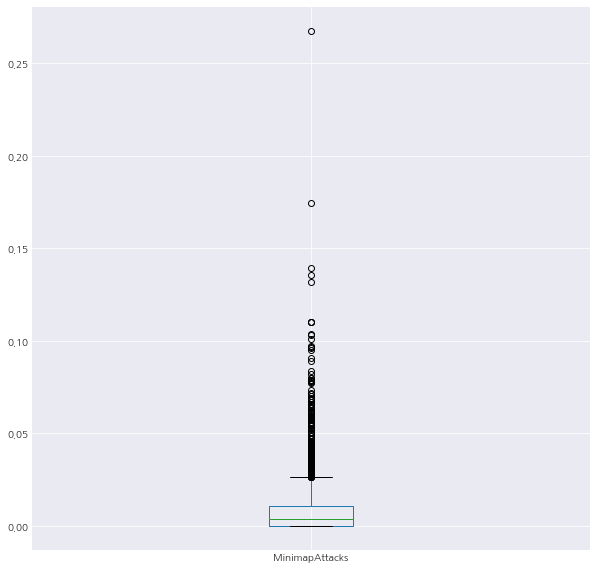

In [179]:
df[['MinimapAttacks']].boxplot(figsize = (10,10))

이상치는 있지만, 범위가 0 ~ 0.003까지 이므로 전체적인 범위가 작음.

In [180]:
df[['MinimapAttacks']].quantile([0.75, 0.8, 0.9, 0.95, 0.99])

MinimapAttacks
0.75        0.010519
0.80        0.013638
0.90        0.023081
0.95        0.034958
0.99        0.068083

In [181]:
df[['MinimapAttacks']].max()

MinimapAttacks    0.267212
dtype: float64

max 값만 제거?

ComplexAbilityUsed - Skew : 3.778854

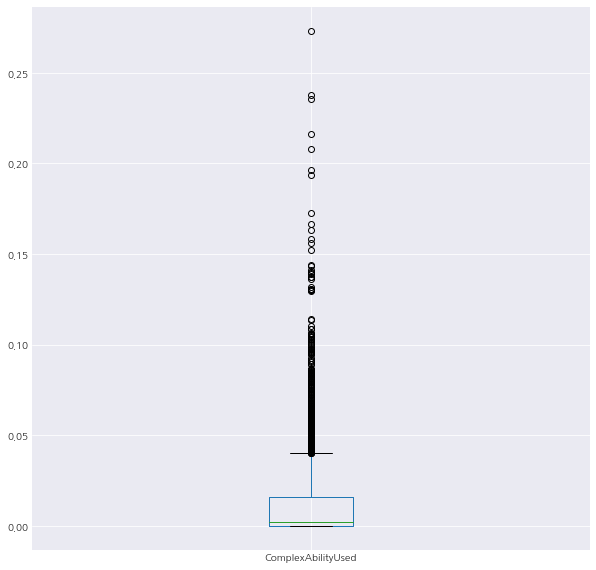

In [182]:
df[['ComplexAbilityUsed']].boxplot(figsize = (10,10))

MinimapAttacks과 마찬가지로 이상치는 있지만, 범위가 0 ~ 0.003까지 이므로 전체적인 범위가 작음.

In [183]:
df[['ComplexAbilityUsed']].quantile([0.75, 0.8, 0.9, 0.95, 0.99])

ComplexAbilityUsed
0.75            0.016051
0.80            0.020208
0.90            0.037406
0.95            0.055350
0.99            0.106002

In [184]:
df[['ComplexAbilityUsed']].max()

ComplexAbilityUsed    0.272907
dtype: float64

max값만 제거? 95% 이상 자르기?

SelectByHotkeys - Skew : 2.965329

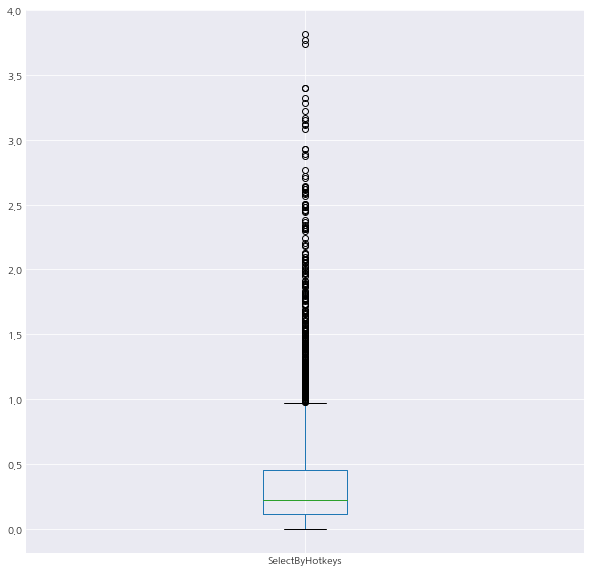

In [185]:
df[['SelectByHotkeys']].boxplot(figsize = (10,10))

MinimapAttacks과 마찬가지로 이상치는 있지만, 범위가 0 ~ 0.04까지 이므로 전체적인 범위가 작음.

In [186]:
df[['SelectByHotkeys']].quantile([0.75, 0.8, 0.9, 0.95, 0.99])

SelectByHotkeys
0.75         0.454233
0.80         0.540822
0.90         0.870160
0.95         1.302003
0.99         2.462626

In [187]:
df[['SelectByHotkeys']].max()

SelectByHotkeys    3.81332
dtype: float64

SelectByHotkeys는 왜도가 2.965329이어서 3에 가까워서 확인한건데, 범위가 크게 벗어나게 차이나진 않아서 이상치제거 안해도 괜찮을듯?

### 그 외 변수들 botxplot확인

Age, HoursPerWeek, APM

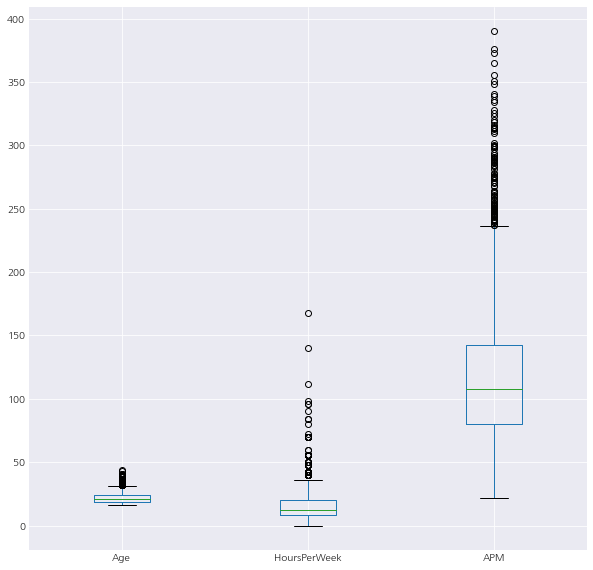

In [188]:
df[['Age', 'HoursPerWeek', 'APM']].boxplot(figsize = (10,10))

SelectByHotKeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, NumberOfPACs

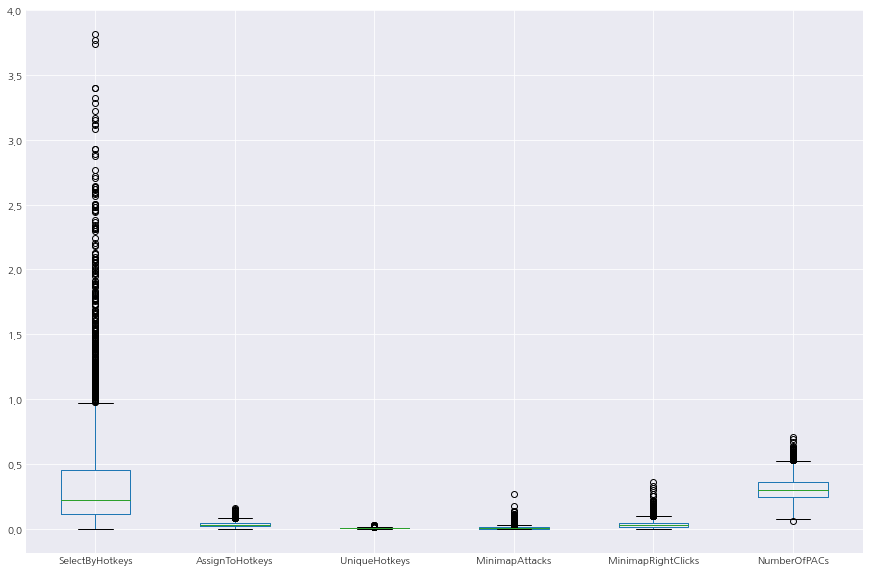

In [189]:
df[['SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs']].boxplot(figsize = (15,10))

AssignToHotKeys 따로 확인

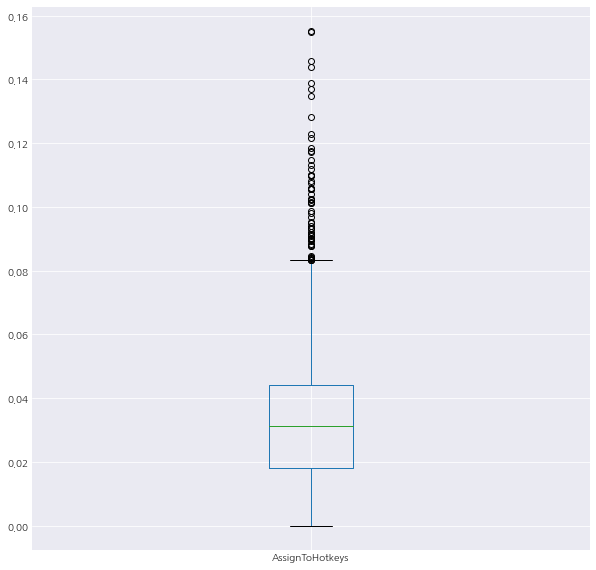

In [190]:
df[['AssignToHotkeys']].boxplot(figsize = (10,10))

UniqueHotkeys 따로 확인

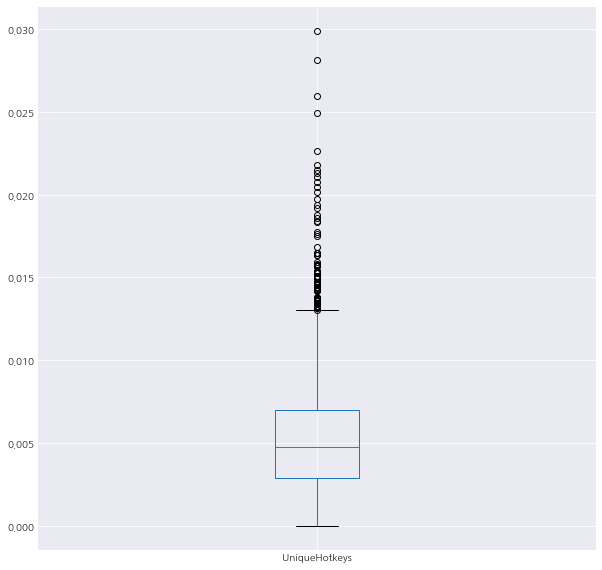

In [191]:
df[['UniqueHotkeys']].boxplot(figsize = (10,10))

GapBetweenPACs, ActionLatency, ActionsInPAC

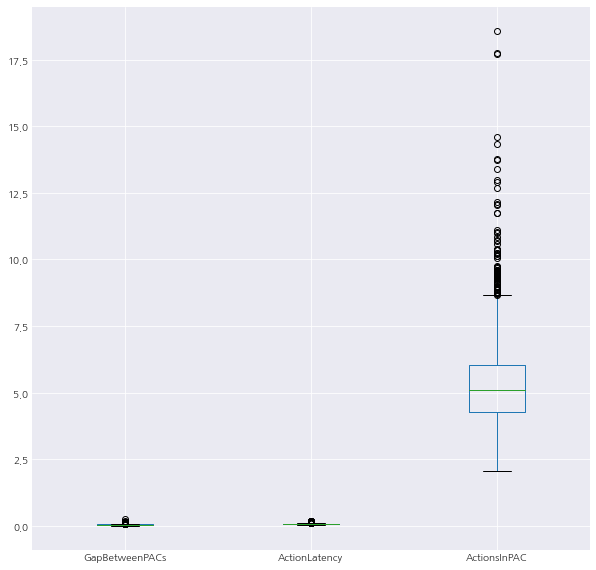

In [192]:
df[['GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC']].boxplot(figsize = (10,10))

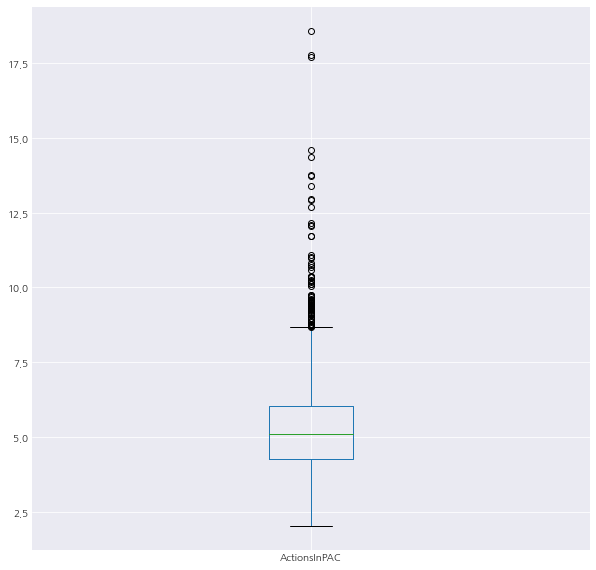

In [193]:
df[['ActionsInPAC']].boxplot(figsize = (10,10))

TotalMapExplored, WorkersMade,UniqueUnitsMade, ComplexUnitsMade, ComplexAbilityUsed

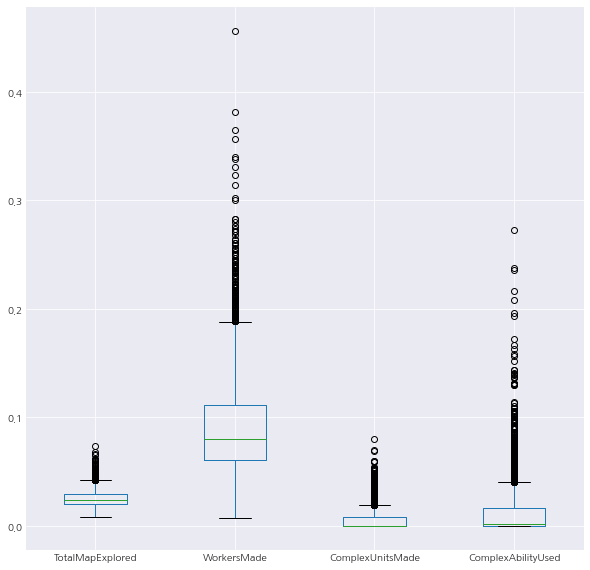

In [194]:
df[['TotalMapExplored', 'WorkersMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']].boxplot(figsize = (10,10))

MatTimeStamp

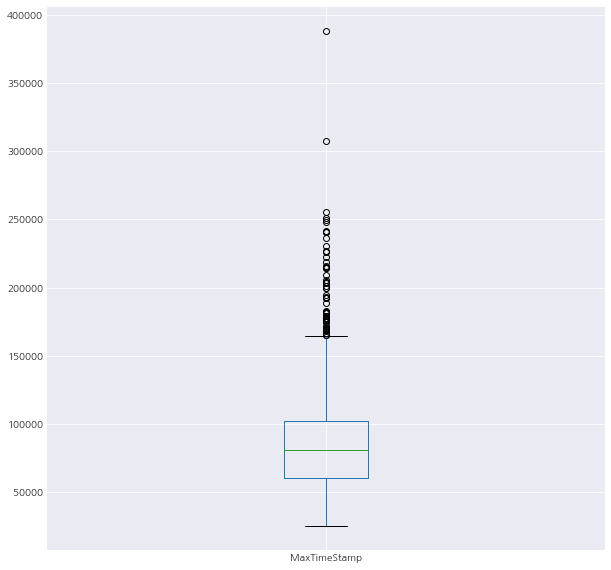

In [195]:
df[['MaxTimeStamp']].boxplot(figsize = (10,10))

skew높은 변수 log처리?

# Q1 아래 이상치 확인

In [196]:
print('HoursPerWeek의 값이 0인 행의 갯수',len(df[(df['HoursPerWeek']==0)]))
print('SelectByHotkeys의 값이 0인 행의 갯수',len(df[(df['SelectByHotkeys']==0)]))
print('AssignToHotkeys의 값이 0인 행의 갯수',len(df[(df['AssignToHotkeys']==0)]))

print('UniqueHotkeys의 값이 0인 행의 갯수',len(df[(df['UniqueHotkeys']==0)]))
print('MinimapAttacks의 값이 0인 행의 갯수',len(df[(df['MinimapAttacks']==0)]))
print('MinimapRightClicks의 값이 0인 행의 갯수',len(df[(df['MinimapRightClicks']==0)]))
print('ComplexUnitsMade의 값이 0인 행의 갯수',len(df[(df['ComplexUnitsMade']==0)]))


HoursPerWeek의 값이 0인 행의 갯수 1
SelectByHotkeys의 값이 0인 행의 갯수 16
AssignToHotkeys의 값이 0인 행의 갯수 6
UniqueHotkeys의 값이 0인 행의 갯수 189
MinimapAttacks의 값이 0인 행의 갯수 877
MinimapRightClicks의 값이 0인 행의 갯수 72
ComplexUnitsMade의 값이 0인 행의 갯수 2281


- HoursPerWeek : 일주일에 게임에 쓴 시간 - 시간이 0일 수 없으니까 지우기..?
- SelectByHotkeys : 단위 타임스탬프당 단축키를 (사용자 정의)사용하여 만든 유닛과 건물의 수 - (범위 0 ~ 0.04, q1=0.001258, q3=0.005133) 단축키 안썼을 수 있으니까 0일 수 있음(데이터 확인)
- AssignToHotkeys : 단위 타임스탬프당 단축키로 (게임의 기본)할당된 유닛과 건물의 수 - (범위 0 ~ 0.001752, q1 = 0.000204, q3 = 0.000499) 단축키 안썼을 수 있으니까 0일 수 있음(데이터 확인)
- UniqueHotkeys : 단위 타임스탬프당 사용한 단축키의 수 - (범위 0~ 0.000338, q1 = 0.000033, q3 = 0.000079) 범위 아주 적고, 단축키 안썼을 수 있으니까 0일 수 있음(0 살리기?, 이거 0 살릴거면 위의 HotKeys 변수들도 0 살려야하지않을까)
- MinimapAttacks : 단위 타임스탬프당 미니맵 공격 - (범위 0 ~ 0.003019, q1 = 0, q3 = 0.000119) 미니맵 공격이 없을 수 있으니까 살리기
- MinimapRightClicks : 단위 타임스탬프당 미니맵 안에서 우클릭한 횟수 - (범위 0 ~ 0.004041, q1 = 0.000140, q3 = 0.000514) - 미니맵 안에서 우클릭한 횟수가 0일 수 있으니까 살리기 (우클릭하면 움직이기만함)
- ComplexUnitsMade : 단위 타임스탬프당 훈련된 ghost, infestor, high templar수 - (범위 0 ~ 0.000902, q1 = 0, q3 = 0.000086) - 센 유닛

In [285]:
2281/ len(df)

0.6718703976435935

In [197]:
df[df['SelectByHotkeys']==0]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours  \
361          361   1074            1  22.0          16.0       400.0   
639          639   1826            1  27.0           2.0       250.0   
938          938   2713            4  21.0          16.0      2700.0   
1231        1231   3564            3  16.0          14.0       730.0   
1273        1273   3720            2  18.0          14.0       230.0   
1332        1332   3843            1  20.0          24.0        75.0   
1364        1364   3912            3  20.0           8.0       350.0   
1540        1540   4427            2  25.0           2.0       200.0   
1556        1556   4504            2  20.0          10.0       100.0   
1644        1644   4737            4  18.0           8.0       100.0   
1744        1744   5020            1  24.0          12.0       400.0   
2177        2177   6119            3  24.0          16.0      1260.0   
2526        2526   7049            2  25.0          16.0       800.0   
3235        3235   9014            2  25.0           8.0       420.0   
3257        3257   9063            4  20.0          28.0       740.0   
3294        3294   9163            3  21.0           6.0       300.0   

           APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  \
361    38.3274              0.0         0.000000       0.000000  ...   
639    37.7802              0.0         0.003823       0.001274  ...   
938    96.4116              0.0         0.003965       0.003965  ...   
1231   70.0308              0.0         0.002974       0.002974  ...   
1273   64.9608              0.0         0.000000       0.000000  ...   
1332   65.7948              0.0         0.000991       0.000991  ...   
1364   55.4574              0.0         0.001416       0.000708  ...   
1540   56.4816              0.0         0.003186       0.002124  ...   
1556   57.9918              0.0         0.001389       0.001389  ...   
1644   56.2860              0.0         0.006726       0.004036  ...   
1744   63.8106              0.0         0.000000       0.000000  ...   
2177   85.9872              0.0         0.000000       0.000000  ...   
2526   51.6324              0.0         0.001690       0.001690  ...   
3235   51.2376              0.0         0.000000       0.000000  ...   
3257  102.8022              0.0         0.006637       0.006637  ...   
3294   88.4328              0.0         0.000000       0.000000  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
361       0.228190        0.076067       0.088628        2.8430   
639       0.222765        0.060690       0.106377        2.8629   
938       0.253673        0.029822       0.061417        6.3125   
1231      0.163757        0.062222       0.086764        6.9273   
1273      0.232196        0.032780       0.068437        4.7479   
1332      0.244623        0.052000       0.082721        4.4696   
1364      0.271268        0.038555       0.069911        3.4987   
1540      0.293826        0.041406       0.077646        3.2166   
1556      0.196987        0.071036       0.089437        4.9507   
1644      0.225999        0.051665       0.068095        4.1607   
1744      0.443640        0.048168       0.051508        2.1006   
2177      0.326174        0.039829       0.066974        4.1880   
2526      0.219796        0.039287       0.094985        3.9769   
3235      0.233944        0.080673       0.078497        3.7416   
3257      0.249043        0.019946       0.047787        6.9200   
3294      0.241686        0.026324       0.064667        6.0333   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
361           0.030174     0.054690         0.005655          0.000000   
639           0.015275     0.028005         0.006363          0.000000   
938           0.025103     0.076630         0.009249          0.000000   
1231          0.035729     0.038706         0.011910          0.000000   
1273          0.027317     0.056586         0.

In [198]:
df[df['AssignToHotkeys']==0]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
361          361   1074            1  22.0          16.0       400.0  38.3274   
1273        1273   3720            2  18.0          14.0       230.0  64.9608   
1744        1744   5020            1  24.0          12.0       400.0  63.8106   
2177        2177   6119            3  24.0          16.0      1260.0  85.9872   
3235        3235   9014            2  25.0           8.0       420.0  51.2376   
3294        3294   9163            3  21.0           6.0       300.0  88.4328   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  NumberOfPACs  \
361               0.0              0.0            0.0  ...      0.228190   
1273              0.0              0.0            0.0  ...      0.232196   
1744              0.0              0.0            0.0  ...      0.443640   
2177              0.0              0.0            0.0  ...      0.326174   
3235              0.0              0.0            0.0  ...      0.233944   
3294              0.0              0.0            0.0  ...      0.241686   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
361         0.076067       0.088628        2.8430          0.030174   
1273        0.032780       0.068437        4.7479          0.027317   
1744        0.048168       0.051508        2.1006          0.028502   
2177        0.039829       0.066974        4.1880          0.019515   
3235        0.080673       0.078497        3.7416          0.024336   
3294        0.026324       0.064667        6.0333          0.025511   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
361      0.054690         0.005655          0.000000            0.000000   
1273     0.056586         0.007806          0.000000            0.000000   
1744     0.039655         0.007434          0.000000            0.000000   
2177     0.152397         0.007434          0.000000            0.000929   
3235     0.099704         0.005496          0.003929            0.030617   
3294     0.068478         0.006717          0.000000            0.000000   

      MaxTimeStamp  
361          46928  
1273         45356  
1744         71416  
2177         95236  
3235        112732  
3294         65912  

[6 rows x 22 columns]

In [199]:
np.unique(df[(df['ComplexUnitsMade']==0)].LeagueIndex.values,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([140, 286, 406, 537, 473, 375,  21,  43], dtype=int64))

In [200]:
np.unique(df['LeagueIndex'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([167, 347, 553, 811, 806, 621,  35,  55], dtype=int64))

In [201]:
cum_cnt = [140, 286, 406, 537, 473, 375,  21,  43]
lidx_cnt = [167, 347, 553, 811, 806, 621,  35,  55]

In [202]:
res = []
for i, x in enumerate(cum_cnt):
    for j, y in enumerate(lidx_cnt):
        if i==j:
            res.append(x/y)
res

[0.8383233532934131,
 0.8242074927953891,
 0.7341772151898734,
 0.6621454993834772,
 0.586848635235732,
 0.6038647342995169,
 0.6,
 0.7818181818181819]

In [222]:
df[(df['Age'].isnull())|(df['HoursPerWeek'].isnull())|(df['TotalHours'].isnull())]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours  \
358          358   1064            5  17.0          20.0         NaN   
1841        1841   5255            5  18.0           NaN         NaN   
3340        3340  10001            8   NaN           NaN         NaN   
3341        3341  10005            8   NaN           NaN         NaN   
3342        3342  10006            8   NaN           NaN         NaN   
3343        3343  10015            8   NaN           NaN         NaN   
3344        3344  10016            8   NaN           NaN         NaN   
3345        3345  10017            8   NaN           NaN         NaN   
3346        3346  10018            8   NaN           NaN         NaN   
3347        3347  10021            8   NaN           NaN         NaN   
3348        3348  10022            8   NaN           NaN         NaN   
3349        3349  10023            8   NaN           NaN         NaN   
3350        3350  10024            8   NaN           NaN         NaN   
3351        3351  10025            8   NaN           NaN         NaN   
3352        3352  10026            8   NaN           NaN         NaN   
3353        3353  10028            8   NaN           NaN         NaN   
3354        3354  10029            8   NaN           NaN         NaN   
3355        3355  10030            8   NaN           NaN         NaN   
3356        3356  10035            8   NaN           NaN         NaN   
3357        3357  10036            8   NaN           NaN         NaN   
3358        3358  10038            8   NaN           NaN         NaN   
3359        3359  10039            8   NaN           NaN         NaN   
3360        3360  10041            8   NaN           NaN         NaN   
3361        3361  10045            8   NaN           NaN         NaN   
3362        3362  10046            8   NaN           NaN         NaN   
3363        3363  10047            8   NaN           NaN         NaN   
3364        3364  10049            8   NaN           NaN         NaN   
3365        3365  10050            8   NaN           NaN         NaN   
3366        3366  10051            8   NaN           NaN         NaN   
3367        3367  10052            8   NaN           NaN         NaN   
3368        3368  10055            8   NaN           NaN         NaN   
3369        3369  10059            8   NaN           NaN         NaN   
3370        3370  10060            8   NaN           NaN         NaN   
3371        3371  10061            8   NaN           NaN         NaN   
3372        3372  10062            8   NaN           NaN         NaN   
3373        3373  10063            8   NaN           NaN         NaN   
3374        3374  10064            8   NaN           NaN         NaN   
3375        3375  10065            8   NaN           NaN         NaN   
3376        3376  10066            8   NaN           NaN         NaN   
3377        3377  10067            8   NaN           NaN         NaN   
3378        3378  10068            8   NaN           NaN         NaN   
3379        3379  10069            8   NaN           NaN         NaN   
3380        3380  10072            8   NaN           NaN         NaN   
3381        3381  10073            8   NaN           NaN         NaN   
3382        3382  10074            8   NaN           NaN         NaN   
3383        3383  10075            8   NaN           NaN         NaN   
3384        3384  10076            8   NaN           NaN         NaN   
3385        3385  10079            8   NaN           NaN         NaN   
3386        3386  10081            8   NaN           NaN         NaN   
3387        3387  10082            8   NaN           NaN         NaN   
3388        3388  10083            8   NaN           NaN         NaN   
3389        3389  10084            8   NaN           NaN         NaN   
3390        3390  10089            8   NaN           NaN         NaN   
3391        3391  10090            8   NaN           NaN         NaN   
3392        3392  10092            8   NaN    

In [227]:
df[df['LeagueIndex']==8]

Unnamed: 0 GameID  LeagueIndex  Age  HoursPerWeek  TotalHours       APM  \
3340        3340  10001            8  NaN           NaN         NaN  189.7404   
3341        3341  10005            8  NaN           NaN         NaN  287.8128   
3342        3342  10006            8  NaN           NaN         NaN  294.0996   
3343        3343  10015            8  NaN           NaN         NaN  274.2552   
3344        3344  10016            8  NaN           NaN         NaN  274.3404   
3345        3345  10017            8  NaN           NaN         NaN  245.8188   
3346        3346  10018            8  NaN           NaN         NaN  211.0722   
3347        3347  10021            8  NaN           NaN         NaN  189.5778   
3348        3348  10022            8  NaN           NaN         NaN  210.5088   
3349        3349  10023            8  NaN           NaN         NaN  248.0118   
3350        3350  10024            8  NaN           NaN         NaN  299.2290   
3351        3351  10025            8  NaN           NaN         NaN  179.9982   
3352        3352  10026            8  NaN           NaN         NaN  340.1982   
3353        3353  10028            8  NaN           NaN         NaN  319.7148   
3354        3354  10029            8  NaN           NaN         NaN  290.5914   
3355        3355  10030            8  NaN           NaN         NaN  275.8632   
3356        3356  10035            8  NaN           NaN         NaN  298.7916   
3357        3357  10036            8  NaN           NaN         NaN  325.1154   
3358        3358  10038            8  NaN           NaN         NaN  146.3892   
3359        3359  10039            8  NaN           NaN         NaN  192.4554   
3360        3360  10041            8  NaN           NaN         NaN  315.6936   
3361        3361  10045            8  NaN           NaN         NaN  203.7726   
3362        3362  10046            8  NaN           NaN         NaN  334.5240   
3363        3363  10047            8  NaN           NaN         NaN  175.5936   
3364        3364  10049            8  NaN           NaN         NaN  252.7206   
3365        3365  10050            8  NaN           NaN         NaN  211.9188   
3366        3366  10051            8  NaN           NaN         NaN  269.8998   
3367        3367  10052            8  NaN           NaN         NaN  190.2396   
3368        3368  10055            8  NaN           NaN         NaN  212.4972   
3369        3369  10059            8  NaN           NaN         NaN  219.3894   
3370        3370  10060            8  NaN           NaN         NaN  230.6694   
3371        3371  10061            8  NaN           NaN         NaN  284.2296   
3372        3372  10062            8  NaN           NaN         NaN  355.3518   
3373        3373  10063            8  NaN           NaN         NaN  364.8504   
3374        3374  10064            8  NaN           NaN         NaN  256.5888   
3375        3375  10065            8  NaN           NaN         NaN  248.4012   
3376        3376  10066            8  NaN           NaN         NaN  251.2284   
3377        3377  10067            8  NaN           NaN         NaN  318.3000   
3378        3378  10068            8  NaN           NaN         NaN  288.9198   
3379        3379  10069            8  NaN           NaN         NaN  313.9080   
3380        3380  10072            8  NaN           NaN         NaN  243.7134   
3381        3381  10073            8  NaN           NaN         NaN  312.9804   
3382        3382  10074            8  NaN           NaN         NaN  313.5762   
3383        3383  10075            8  NaN           NaN         NaN  274.6194   
3384        3384  10076            8  NaN           NaN         NaN  225.0678   
3385        3385  10079            8  NaN           NaN         NaN  254.2188   
3386        3386  10081            8  NaN           NaN         NaN  339.1524   
3387        3387  10082            8  NaN           NaN         NaN  310.0416   
3388        3388  10083            8 

LeagueIndex가 8이면서 Age, HoursPerWeek, TotalHours가 결측치가 없는 행은 없다

In [228]:
df.columns

Index(['Unnamed: 0', 'GameID', 'LeagueIndex', 'Age', 'HoursPerWeek',
       'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

In [229]:
dup_check_col = ['APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilityUsed', 'MaxTimeStamp']
dup_check_col

['APM',
 'SelectByHotkeys',
 'AssignToHotkeys',
 'UniqueHotkeys',
 'MinimapAttacks',
 'MinimapRightClicks',
 'NumberOfPACs',
 'GapBetweenPACs',
 'ActionLatency',
 'ActionsInPAC',
 'TotalMapExplored',
 'WorkersMade',
 'UniqueUnitsMade',
 'ComplexUnitsMade',
 'ComplexAbilityUsed',
 'MaxTimeStamp']

In [230]:
df[df.duplicated(subset = dup_check_col,keep=False)]

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
1401        1401   4064            5  25.0          20.0       700.0  95.5704   
1409        1409   4075            5  25.0          20.0       700.0  95.5704   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  NumberOfPACs  \
1401         0.167685         0.029345       0.005239  ...      0.285065   
1409         0.167685         0.029345       0.005239  ...      0.285065   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
1401        0.035336       0.063309        5.1618          0.019913   
1409        0.035336       0.063309        5.1618          0.019913   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
1401     0.064978         0.005239          0.029345            0.045065   
1409     0.064978         0.005239          0.029345            0.045065   

      MaxTimeStamp  
1401         84444  
1409         84444  

[2 rows x 22 columns]

LeagueIndex==7인 것과 8인 것의 겹치는 행은 없다. 그냥 단순히 LeagueIndex 7과 8을 합쳐도 될듯

### TotalHours의 max값(이상치)제거

In [244]:
#df['TotalHours'].max()
df_out = df[df['TotalHours']!=(df['TotalHours'].max())]
df_out

Unnamed: 0 GameID  LeagueIndex   Age  HoursPerWeek  TotalHours  \
0              0     52            5  27.0          10.0      3000.0   
1              1     55            5  23.0          10.0      5000.0   
2              2     56            4  30.0          10.0       200.0   
3              3     57            3  19.0          20.0       400.0   
4              4     58            3  32.0          10.0       500.0   
...          ...    ...          ...   ...           ...         ...   
3390        3390  10089            8   NaN           NaN         NaN   
3391        3391  10090            8   NaN           NaN         NaN   
3392        3392  10092            8   NaN           NaN         NaN   
3393        3393  10094            8   NaN           NaN         NaN   
3394        3394  10095            8   NaN           NaN         NaN   

           APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  ...  \
0     143.7180         0.311092         0.019443       0.004859  ...   
1     129.2322         0.292387         0.022962       0.006124  ...   
2      69.9612         0.097447         0.029698       0.003708  ...   
3     107.6016         0.091468         0.018859       0.000947  ...   
4     122.8908         0.100537         0.028968       0.003407  ...   
...        ...              ...              ...            ...  ...   
3390  259.6296         1.807640         0.065752       0.009701  ...   
3391  314.6700         2.481818         0.102410       0.021789  ...   
3392  299.4282         2.508180         0.076129       0.009516  ...   
3393  375.8664         3.224577         0.052592       0.008222  ...   
3394  348.3576         2.642161         0.071789       0.003301  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.429140        0.032668       0.040867        4.7508   
1         0.381175        0.032919       0.042345        4.8434   
2         0.258929        0.044647       0.075355        4.0430   
3         0.334756        0.029220       0.053735        4.9155   
4         0.209594        0.022689       0.062081        9.3740   
...            ...             ...            ...           ...   
3390      0.403135        0.018606       0.042834        6.2754   
3391      0.376957        0.014302       0.036116        7.1965   
3392      0.392880        0.012403       0.039516        6.3979   
3393      0.384583        0.011691       0.034855        7.9615   
3394      0.492620        0.020054       0.033514        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168          0.000000   
1             0.033678     0.105625         0.007655          0.000000   
2             0.020417     0.065893         0.005567          0.000000   
3             0.017916     0.037719         0.006602          0.000000   
4             0.025560     0.103943         0.006814          0.000000   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390          0.000000   
3391          0.034863     0.069726         0.008717          0.000000   
3392          0.025830     0.111475         0.005434          0.000000   
3393          0.024653     0.054236         0.009861          0.000000   
3394          0.022279     0.138626         0.005779          0.040433   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.018370         57812  
2               0.016705         95360  
3               0.033947         93852  
4               0.001708         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.055880         53848  
3394            0.079215        107252  

[3394 rows x 22 columns]

In [245]:
df_out.loc[df_out['LeagueIndex']==7,['HoursPerWeek','TotalHours']].describe()

HoursPerWeek    TotalHours
count     35.000000     35.000000
mean      31.714286   1581.028571
std       20.626327   1652.020679
min        6.000000    240.000000
25%       15.000000    715.000000
50%       28.000000   1250.000000
75%       42.000000   2000.000000
max       98.000000  10000.000000

LeagueIndex 7인것의 HoursPerWeek의 평균은 31.714286, TotalHours의 평균은 1581.028571

### 결측치 개수확인

In [203]:
df.isnull().sum().to_frame('nan_count')

nan_count
Unnamed: 0                  0
GameID                      0
LeagueIndex                 0
Age                        55
HoursPerWeek               56
TotalHours                 57
APM                         0
SelectByHotkeys             0
AssignToHotkeys             0
UniqueHotkeys               0
MinimapAttacks              0
MinimapRightClicks          0
NumberOfPACs                0
GapBetweenPACs              0
ActionLatency               0
ActionsInPAC                0
TotalMapExplored            0
WorkersMade                 0
UniqueUnitsMade             0
ComplexUnitsMade            0
ComplexAbilityUsed          0
MaxTimeStamp                0

In [204]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

nan_ratio
Unnamed: 0           0.000000
GameID               0.000000
LeagueIndex          0.000000
Age                  0.016200
HoursPerWeek         0.016495
TotalHours           0.016789
APM                  0.000000
SelectByHotkeys      0.000000
AssignToHotkeys      0.000000
UniqueHotkeys        0.000000
MinimapAttacks       0.000000
MinimapRightClicks   0.000000
NumberOfPACs         0.000000
GapBetweenPACs       0.000000
ActionLatency        0.000000
ActionsInPAC         0.000000
TotalMapExplored     0.000000
WorkersMade          0.000000
UniqueUnitsMade      0.000000
ComplexUnitsMade     0.000000
ComplexAbilityUsed   0.000000
MaxTimeStamp         0.000000

결측치 있는 변수들 탐색

C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, '비율')

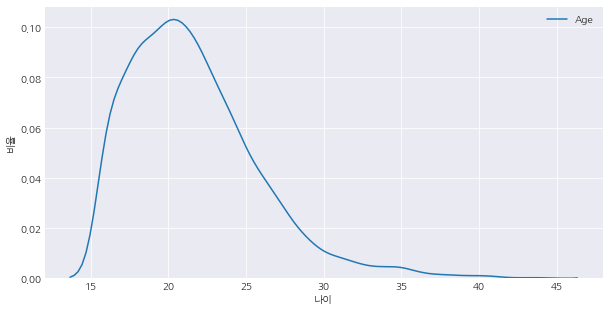

In [205]:
plt.figure(figsize=(10,5))
age_dist=sns.kdeplot(df['Age']) 
age_dist.set_xlabel("나이")
age_dist.set_ylabel("비율")

나이여서 결측치 없애는게 낫지 않을까?

아니면 다른 변수와 쌍으로 분포 확인해서 채워넣기?

C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, '비율')

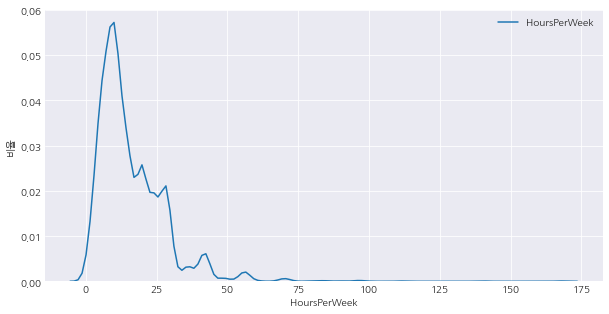

In [206]:
plt.figure(figsize=(10,5))
age_dist=sns.kdeplot(df['HoursPerWeek']) 
age_dist.set_xlabel("HoursPerWeek")
age_dist.set_ylabel("비율")

C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, '비율')

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


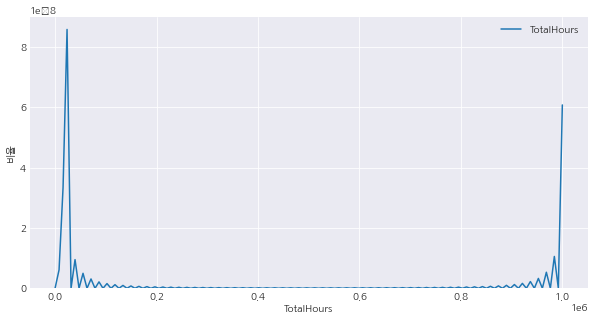

In [207]:
plt.figure(figsize=(10,5))
age_dist=sns.kdeplot(df['TotalHours']) 
age_dist.set_xlabel("TotalHours")
age_dist.set_ylabel("비율")

HoursPerWeek 변수와 TotalHours와의 관계 파악

**변수 설명 참고**

- HoursPerWeek : 일주일 동안 게임하는 데에 쓴 시간
- TotalHours : 게임하는데에 쓴 총 시간

<Figure size 720x360 with 0 Axes>

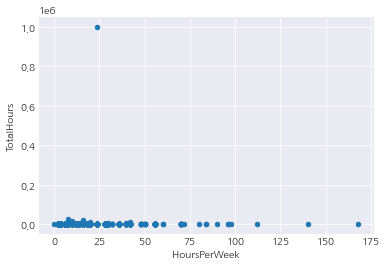

In [208]:
#scatter plot
plt.figure(figsize=(10,5))
df.plot.scatter(x='HoursPerWeek',y='TotalHours')
plt.show()

In [209]:
df_cut = df.dropna(axis=0)
df_cut.isnull().sum().to_frame('nan_count')

nan_count
Unnamed: 0                  0
GameID                      0
LeagueIndex                 0
Age                         0
HoursPerWeek                0
TotalHours                  0
APM                         0
SelectByHotkeys             0
AssignToHotkeys             0
UniqueHotkeys               0
MinimapAttacks              0
MinimapRightClicks          0
NumberOfPACs                0
GapBetweenPACs              0
ActionLatency               0
ActionsInPAC                0
TotalMapExplored            0
WorkersMade                 0
UniqueUnitsMade             0
ComplexUnitsMade            0
ComplexAbilityUsed          0
MaxTimeStamp                0

In [210]:
np.corrcoef(df_cut['HoursPerWeek'],df_cut['TotalHours'])[0,1]

0.024306306950630463

HoursPerWeek과 TotalHours는 상관관계가 없음

In [211]:
df_cut.columns

Index(['Unnamed: 0', 'GameID', 'LeagueIndex', 'Age', 'HoursPerWeek',
       'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

## 변수별 상관관계 그래프 확인

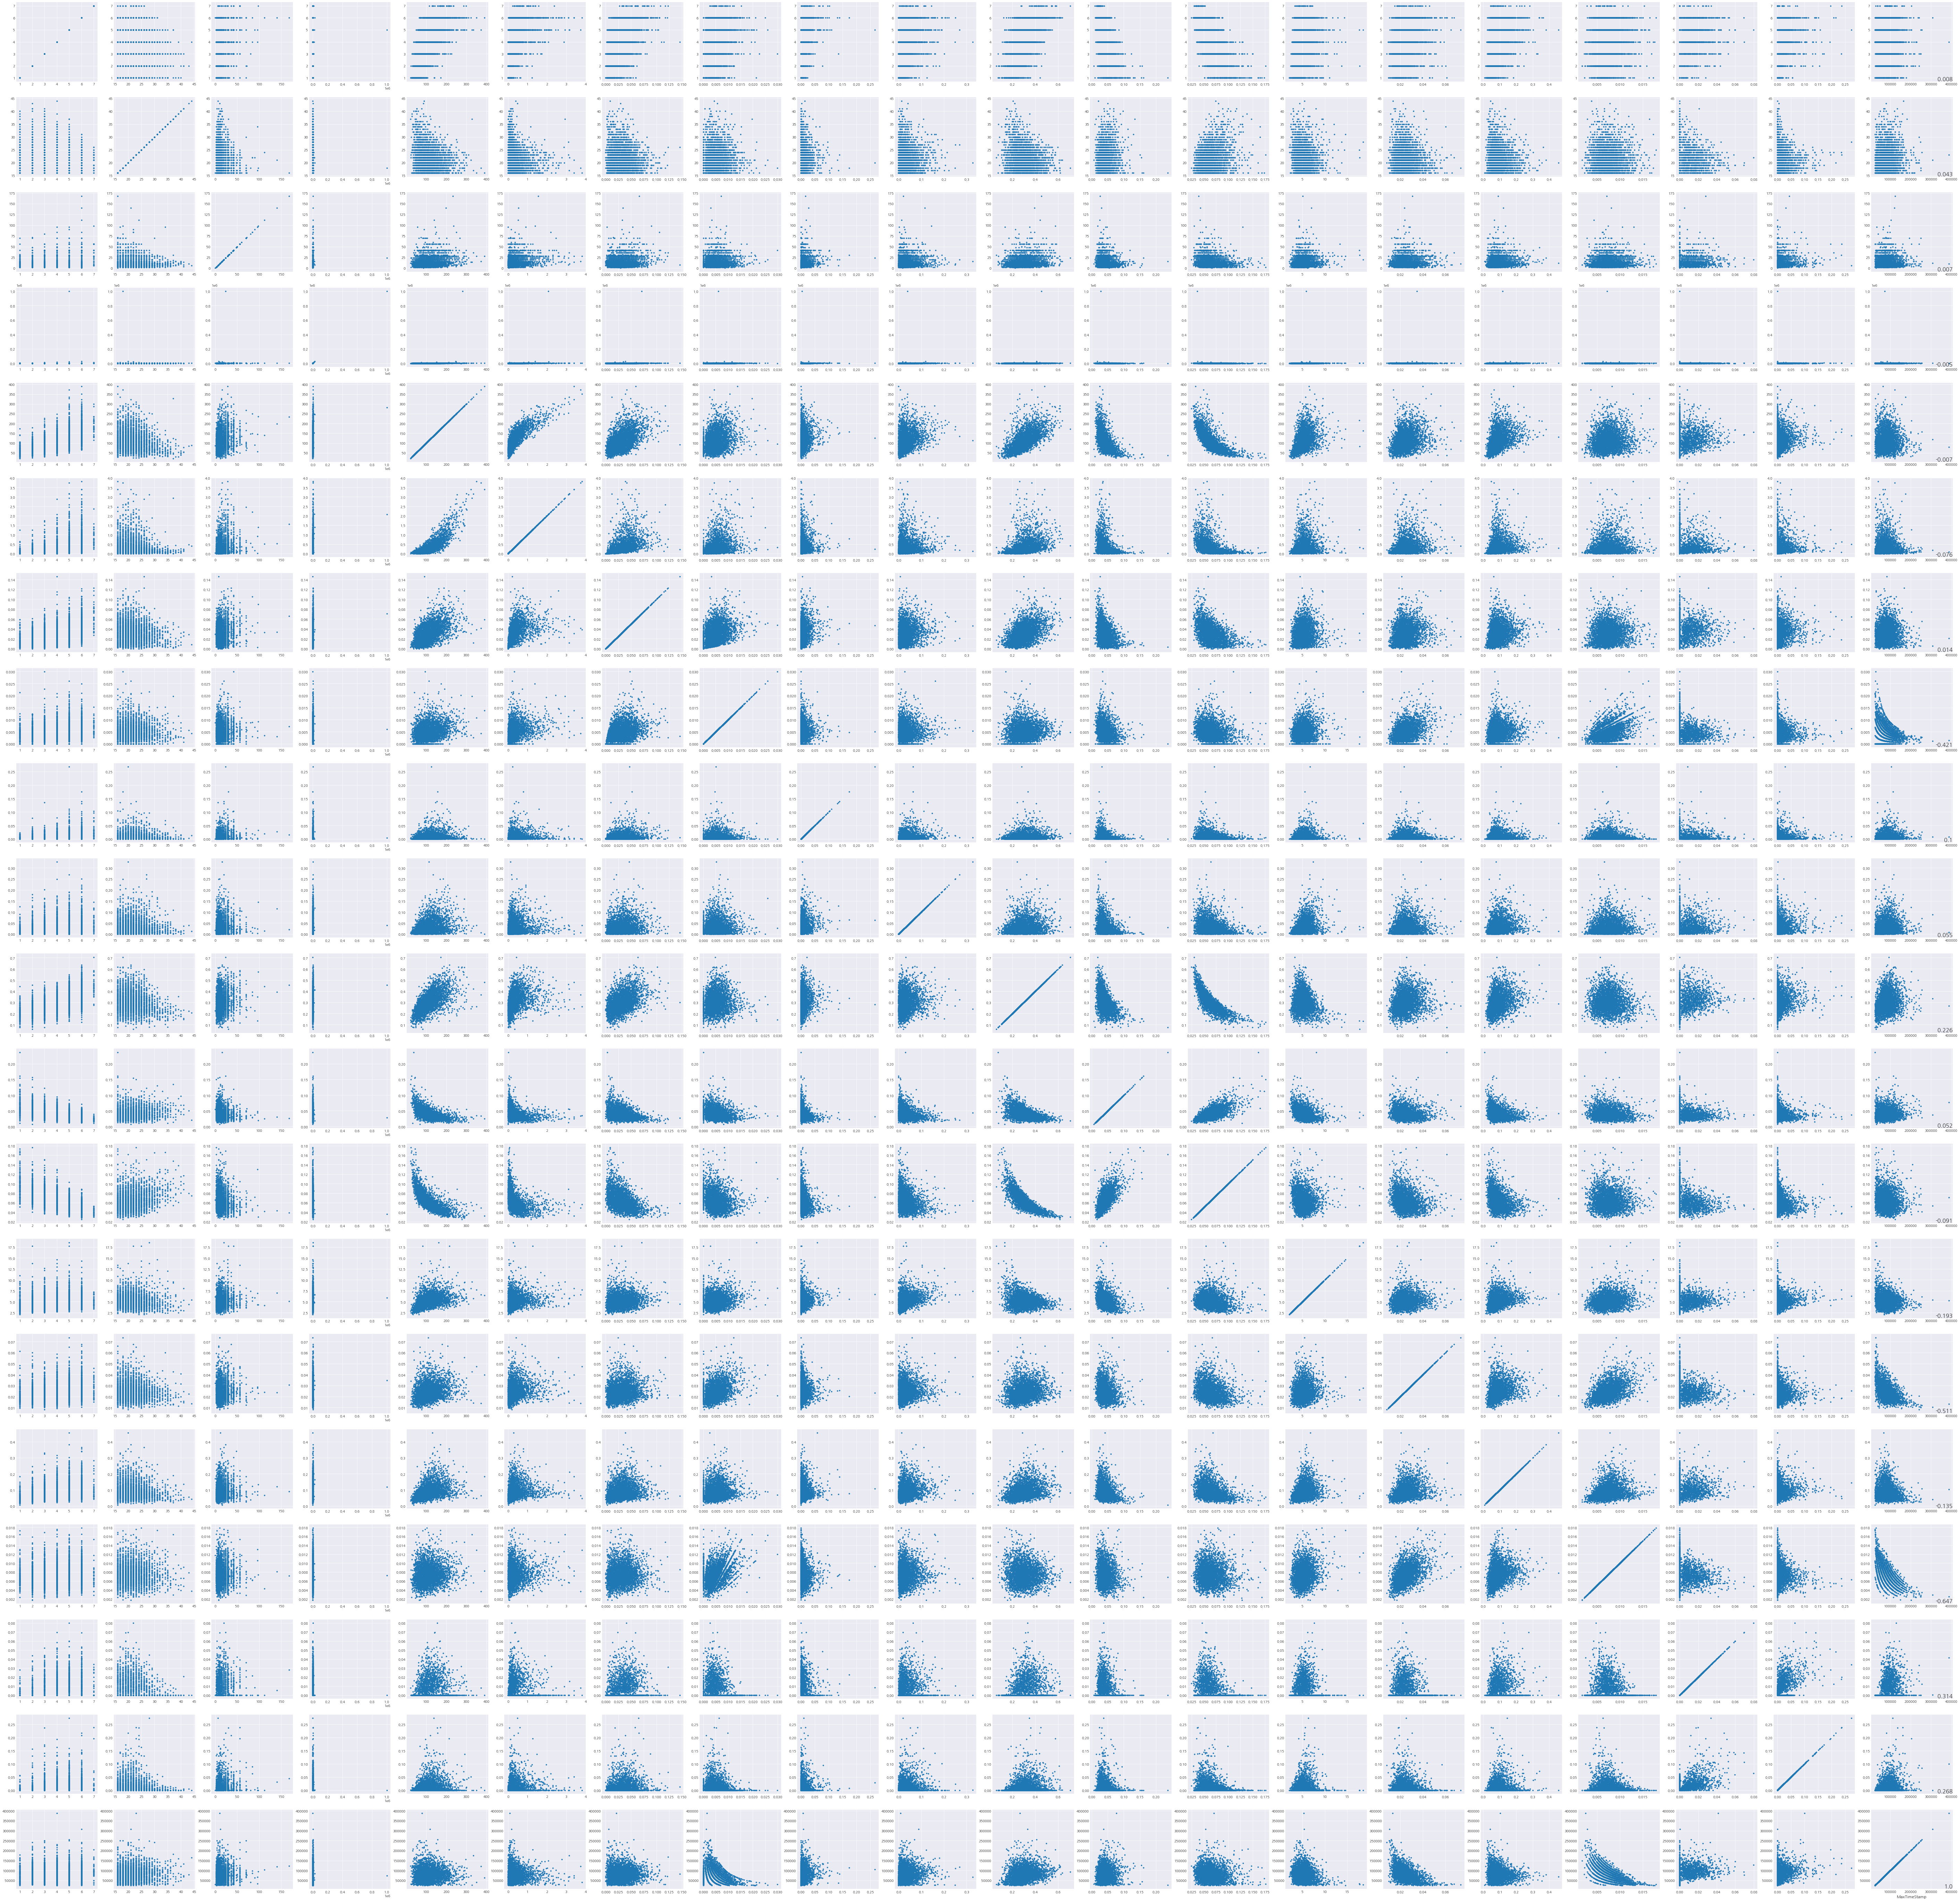

In [212]:
fig = plt.figure(figsize = (100,100))

feature = ['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']

corr_feature = df_cut[feature].corr()

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_cut, s=9)
    
    if i == n_feature -1 :
        plt.xlabel(feature[j], fontsize=12)
        
    if j == 0:
        plt.ylabel(feature[i], fontsize=12)
    ax.annotate(np.round(corr_feature.loc[feature[i],feature[j]],3), xy=(1,0),
               xycoords = 'axes fraction', fontsize=16,
               horizontalalignment = 'right', verticalalignment='bottom')
    
plt.show()

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


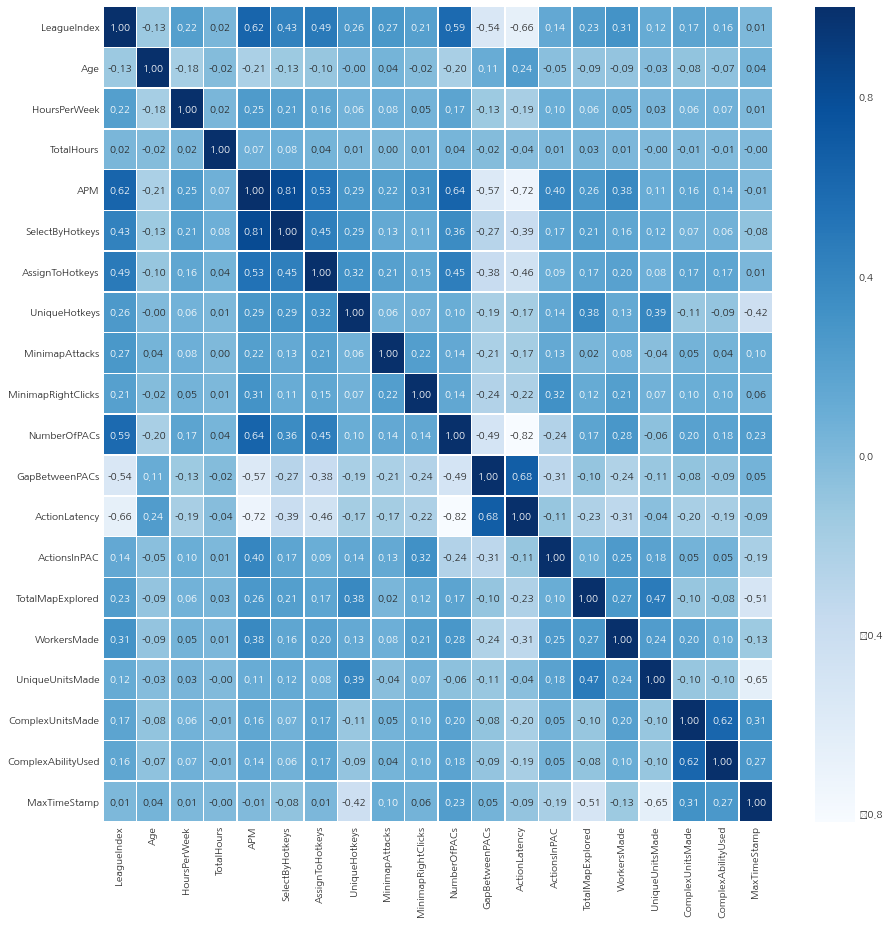

In [213]:
plt.figure(figsize=(15,15))
sns.heatmap(data = corr_feature, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 상관계수 0.7 이상 : (SelectByHotkeys,APM), 
- 상관계수 0.5 ~ 0.7 : (APM,LegueIndex), (NumberOfPACs,LegueIndex), (AssignToHotkeys,APM), (NumberOfPACs,APM),  (ActionLatency,GapBetweenPACs), (ComplexAbilityUsed,ComplexUnitsMade)
                        
- 상관계수 0.4 ~ 0.5 : (SelectByHotkeys,LegueIndex), (AssignToHotkeys,LegueIndex), (ActionslnPAC,APM),(AssignToHotkeys,SelectByHotkeys), (NumberOfPACs,SelectByHotkeys), (NumberOfPACs,AssignToHotkeys),(UniqueUnitsMade,TotalMapExlored)
                        
                        
- 상관계수 -0.7 이하 : (ActionLatency,APM), (ActionLatency,NumberOfPACs)
- 상관계수 -0.7 ~ -0.5 : (GapBetweenPACs,LegueIndex),(ActionLatency,LegueIndex), (GapBetweenPACs,APM),(MaxTimeStamp,TotalMapExplored), (MaxTimeStamp,UniqueUnitsMade)
- 상관계수 -0.5 ~ -0.4 : (ActionLatency,AssignToHotkeys), (MaxTimeStamp,UniqueHotkeys), (GapBetweenPACs,NumberOfPACs)




## 변수확인

In [214]:
df_cut['LeagueIndex'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [215]:
league_bar = df_cut.groupby('LeagueIndex').count()
league_bar

Unnamed: 0  GameID  Age  HoursPerWeek  TotalHours  APM  \
LeagueIndex                                                           
1                   167     167  167           167         167  167   
2                   347     347  347           347         347  347   
3                   553     553  553           553         553  553   
4                   811     811  811           811         811  811   
5                   804     804  804           804         804  804   
6                   621     621  621           621         621  621   
7                    35      35   35            35          35   35   

             SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
LeagueIndex                                                                    
1                        167              167            167             167   
2                        347              347            347             347   
3                        553              553            553             553   
4                        811              811            811             811   
5                        804              804            804             804   
6                        621              621            621             621   
7                         35               35             35              35   

             ...  NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
LeagueIndex  ...                                                              
1            ...           167             167            167           167   
2            ...           347             347            347           347   
3            ...           553             553            553           553   
4            ...           811             811            811           811   
5            ...           804             804            804           804   
6            ...           621             621            621           621   
7            ...            35              35             35            35   

             TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
LeagueIndex                                                                     
1                         167          167              167               167   
2                         347          347              347               347   
3                         553          553              553               553   
4                         811          811              811               811   
5                         804          804              804               804   
6                         621          621              621               621   
7                          35           35               35                35   

             ComplexAbilityUsed  MaxTimeStamp  
LeagueIndex                                    
1                           167           167  
2                           347           347  
3                           553           553  
4                           811           811  
5                           804           804  
6                           621           621  
7                            35            35  

[7 rows x 21 columns]

In [216]:
df['LeagueIndex']

0       5
1       5
2       4
3       3
4       3
       ..
3390    8
3391    8
3392    8
3393    8
3394    8
Name: LeagueIndex, Length: 3395, dtype: int64

# 변수 생성 및 축소

In [295]:
df_log.loc[df_log['ComplexUnitsMade']==0,'ComplexUnitsMade'] = int(0)
df_log.loc[df_log['ComplexUnitsMade']!=0,'ComplexUnitsMade'] = int(1)
df_log['ComplexUnitsMade'].unique()

array([0., 1.])

In [297]:
df_log['ComplexUnitsMade'] = df_log['ComplexUnitsMade'].astype(int)
df_log

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0      1.223156    2.197969  143.7180   
1        55            5  23.0      1.223156    2.253121  129.2322   
2        56            4  30.0      1.223156    1.841074   69.9612   
3        57            3  19.0      1.397363    1.945047  107.6016   
4        58            3  32.0      1.223156    1.976385  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.429140        0.032668       0.040867        4.7508   
1         0.381175        0.032919       0.042345        4.8434   
2         0.258929        0.044647       0.075355        4.0430   
3         0.334756        0.029220       0.053735        4.9155   
4         0.209594        0.022689       0.062081        9.3740   
...            ...             ...            ...           ...   
3390      0.403135        0.018606       0.042834        6.2754   
3391      0.376957        0.014302       0.036116        7.1965   
3392      0.392880        0.012403       0.039516        6.3979   
3393      0.384583        0.011691       0.034855        7.9615   
3394      0.492620        0.020054       0.033514        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168                 0   
1             0.033678     0.105625         0.007655                 0   
2             0.020417     0.065893         0.005567                 0   
3             0.017916     0.037719         0.006602                 0   
4             0.025560     0.103943         0.006814                 0   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390                 0   
3391          0.034863     0.069726         0.008717                 0   
3392          0.025830     0.111475         0.005434                 0   
3393          0.024653     0.054236         0.009861                 0   
3394          0.022279     0.138626         0.005779                 1   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.018370         57812  
2               0.016705         95360  
3               0.033947         93852  
4               0.001708         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.055880         53848  
3394            0.079215        107252  

[3393 rows x 21 columns]

In [299]:
df_log.to_csv('Hours이상치제거_log변환_ComplexUnitsMade.csv', index=False)

In [300]:
df_log['APS'] = df_log['APM']/60
df_log

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0      1.223156    2.197969  143.7180   
1        55            5  23.0      1.223156    2.253121  129.2322   
2        56            4  30.0      1.223156    1.841074   69.9612   
3        57            3  19.0      1.397363    1.945047  107.6016   
4        58            3  32.0      1.223156    1.976385  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
0           0.032668       0.040867        4.7508          0.019443   
1           0.032919       0.042345        4.8434          0.033678   
2           0.044647       0.075355        4.0430          0.020417   
3           0.029220       0.053735        4.9155          0.017916   
4           0.022689       0.062081        9.3740          0.025560   
...              ...            ...           ...               ...   
3390        0.018606       0.042834        6.2754          0.049583   
3391        0.014302       0.036116        7.1965          0.034863   
3392        0.012403       0.039516        6.3979          0.025830   
3393        0.011691       0.034855        7.9615          0.024653   
3394        0.020054       0.033514        6.3719          0.022279   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
0        0.123599         0.004168                 0            0.000000   
1        0.105625         0.007655                 0            0.018370   
2        0.065893         0.005567                 0            0.016705   
3        0.037719         0.006602                 0            0.033947   
4        0.103943         0.006814                 0            0.001708   
...           ...              ...               ...                 ...   
3390     0.077609         0.005390                 0            0.000000   
3391     0.069726         0.008717                 0            0.000000   
3392     0.111475         0.005434                 0            0.000000   
3393     0.054236         0.009861                 0            0.055880   
3394     0.138626         0.005779                 1            0.079215   

      MaxTimeStamp      APS  
0           127448  2.39530  
1            57812  2.15387  
2            95360  1.16602  
3            93852  1.79336  
4            51936  2.04818  
...            ...      ...  
3390         82104  4.32716  
3391         40616  5.24450  
3392         65100  4.99047  
3393         53848  6.26444  
3394        107252  5.80596  

[3393 rows x 22 columns]

# 변수 최종 정리

In [301]:
df_log

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0      1.223156    2.197969  143.7180   
1        55            5  23.0      1.223156    2.253121  129.2322   
2        56            4  30.0      1.223156    1.841074   69.9612   
3        57            3  19.0      1.397363    1.945047  107.6016   
4        58            3  32.0      1.223156    1.976385  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
0           0.032668       0.040867        4.7508          0.019443   
1           0.032919       0.042345        4.8434          0.033678   
2           0.044647       0.075355        4.0430          0.020417   
3           0.029220       0.053735        4.9155          0.017916   
4           0.022689       0.062081        9.3740          0.025560   
...              ...            ...           ...               ...   
3390        0.018606       0.042834        6.2754          0.049583   
3391        0.014302       0.036116        7.1965          0.034863   
3392        0.012403       0.039516        6.3979          0.025830   
3393        0.011691       0.034855        7.9615          0.024653   
3394        0.020054       0.033514        6.3719          0.022279   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
0        0.123599         0.004168                 0            0.000000   
1        0.105625         0.007655                 0            0.018370   
2        0.065893         0.005567                 0            0.016705   
3        0.037719         0.006602                 0            0.033947   
4        0.103943         0.006814                 0            0.001708   
...           ...              ...               ...                 ...   
3390     0.077609         0.005390                 0            0.000000   
3391     0.069726         0.008717                 0            0.000000   
3392     0.111475         0.005434                 0            0.000000   
3393     0.054236         0.009861                 0            0.055880   
3394     0.138626         0.005779                 1            0.079215   

      MaxTimeStamp      APS  
0           127448  2.39530  
1            57812  2.15387  
2            95360  1.16602  
3            93852  1.79336  
4            51936  2.04818  
...            ...      ...  
3390         82104  4.32716  
3391         40616  5.24450  
3392         65100  4.99047  
3393         53848  6.26444  
3394        107252  5.80596  

[3393 rows x 22 columns]

In [304]:
df_log[['SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks']].sum()

SelectByHotkeys       1289.456483
AssignToHotkeys        112.143609
MinimapAttacks          29.533409
MinimapRightClicks     116.350963
dtype: float64

In [305]:
df_log.eval('ActionRate = (SelectByHotkeys + AssignToHotkeys + MinimapAttacks + MinimapRightClicks) / APS', inplace=True)

In [308]:
df_log.eval('HotkeyRate = (SelectByHotkeys + AssignToHotkeys) / APS', inplace=True)
df_log.eval('MinimapkeyRate = (MinimapAttacks + MinimapRightClicks) / APS', inplace=True)

In [309]:
df_log

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0        52            5  27.0      1.223156    2.197969  143.7180   
1        55            5  23.0      1.223156    2.253121  129.2322   
2        56            4  30.0      1.223156    1.841074   69.9612   
3        57            3  19.0      1.397363    1.945047  107.6016   
4        58            3  32.0      1.223156    1.976385  122.8908   
...     ...          ...   ...           ...         ...       ...   
3390  10089            8   NaN           NaN         NaN  259.6296   
3391  10090            8   NaN           NaN         NaN  314.6700   
3392  10092            8   NaN           NaN         NaN  299.4282   
3393  10094            8   NaN           NaN         NaN  375.8664   
3394  10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.311092         0.019443       0.004859        0.009722  ...   
1            0.292387         0.022962       0.006124        0.026024  ...   
2            0.097447         0.029698       0.003708        0.025986  ...   
3            0.091468         0.018859       0.000947        0.004717  ...   
4            0.100537         0.028968       0.003407        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         1.807640         0.065752       0.009701        0.054973  ...   
3391         2.481818         0.102410       0.021789        0.021789  ...   
3392         2.508180         0.076129       0.009516        0.029908  ...   
3393         3.224577         0.052592       0.008222        0.018079  ...   
3394         2.642161         0.071789       0.003301        0.019804  ...   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.019443     0.123599         0.004168                 0   
1             0.033678     0.105625         0.007655                 0   
2             0.020417     0.065893         0.005567                 0   
3             0.017916     0.037719         0.006602                 0   
4             0.025560     0.103943         0.006814                 0   
...                ...          ...              ...               ...   
3390          0.049583     0.077609         0.005390                 0   
3391          0.034863     0.069726         0.008717                 0   
3392          0.025830     0.111475         0.005434                 0   
3393          0.024653     0.054236         0.009861                 0   
3394          0.022279     0.138626         0.005779                 1   

      ComplexAbilityUsed  MaxTimeStamp      APS  ActionRate  HotkeyRate  \
0               0.000000        127448  2.39530    0.156547    0.137993   
1               0.018370         57812  2.15387    0.176262    0.146411   
2               0.016705         95360  1.16602    0.166348    0.109041   
3               0.033947         93852  1.79336    0.090967    0.061520   
4               0.001708         51936  2.04818    0.120635    0.063230   
...                  ...           ...      ...         ...         ...   
3390            0.000000         82104  4.32716    0.448631    0.432938   
3391            0.000000         40616  5.24450    0.515186    0.492750   
3392            0.000000         65100  4.99047    0.526838    0.517849   
3393            0.055880         53848  6.26444    0.537043    0.523138   
3394            0.079215        107252  5.80596    0.490892    0.467442   

      MinimapkeyRate  
0           0.018554  
1           0.029851  
2           0.057306  
3           0.029447  
4           0.057406  
...              ...  
3390        0.015693  
3391        0.022435  
3392        0.008989  
3393        0.013905  
3394        0.023450  

[3393 rows x 25 columns]

In [310]:
df_log.to_csv('Hours이상치제거_log변환_ComplexUnitsMade_ActionRates.csv', index = False)

In [311]:
df_log.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp', 'APS',
       'ActionRate', 'HotkeyRate', 'MinimapkeyRate'],
      dtype='object')

In [313]:
final_cols = ['HotkeyRate', 'MinimapkeyRate', 'WorkersMade', 'ComplexUnitsMade', 'HoursPerWeek', 'TotalHours', 'MaxTimeStamp']
df_log[final_cols]

HotkeyRate  MinimapkeyRate  WorkersMade  ComplexUnitsMade  HoursPerWeek  \
0       0.137993        0.018554     0.123599                 0      1.223156   
1       0.146411        0.029851     0.105625                 0      1.223156   
2       0.109041        0.057306     0.065893                 0      1.223156   
3       0.061520        0.029447     0.037719                 0      1.397363   
4       0.063230        0.057406     0.103943                 0      1.223156   
...          ...             ...          ...               ...           ...   
3390    0.432938        0.015693     0.077609                 0           NaN   
3391    0.492750        0.022435     0.069726                 0           NaN   
3392    0.517849        0.008989     0.111475                 0           NaN   
3393    0.523138        0.013905     0.054236                 0           NaN   
3394    0.467442        0.023450     0.138626                 1           NaN   

      TotalHours  MaxTimeStamp  
0       2.197969        127448  
1       2.253121         57812  
2       1.841074         95360  
3       1.945047         93852  
4       1.976385         51936  
...          ...           ...  
3390         NaN         82104  
3391         NaN         40616  
3392         NaN         65100  
3393         NaN         53848  
3394         NaN        107252  

[3393 rows x 7 columns]

# 기본 결측치 대체

In [348]:
data = pd.read_csv('기본 데이터 평균값 대체_수정.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

GameID  LeagueIndex        Age  HoursPerWeek   TotalHours       APM  \
0         52            5  27.000000     10.000000  3000.000000  143.7180   
1         55            5  23.000000     10.000000  5000.000000  129.2322   
2         56            4  30.000000     10.000000   200.000000   69.9612   
3         57            3  19.000000     20.000000   400.000000  107.6016   
4         58            3  32.000000     10.000000   500.000000  122.8908   
...      ...          ...        ...           ...          ...       ...   
3390   10089            7  21.314286      1.387669     2.025098  259.6296   
3391   10090            7  21.314286      1.387669     2.025098  314.6700   
3392   10092            7  21.314286      1.387669     2.025098  299.4282   
3393   10094            7  21.314286      1.387669     2.025098  375.8664   
3394   10095            7  21.314286      1.387669     2.025098  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.003515         0.000220       0.000055        0.000110  ...   
1            0.003304         0.000259       0.000069        0.000294  ...   
2            0.001101         0.000336       0.000042        0.000294  ...   
3            0.001034         0.000213       0.000011        0.000053  ...   
4            0.001136         0.000327       0.000039        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         0.020425         0.000743       0.000110        0.000621  ...   
3391         0.028043         0.001157       0.000246        0.000246  ...   
3392         0.028341         0.000860       0.000108        0.000338  ...   
3393         0.036436         0.000594       0.000093        0.000204  ...   
3394         0.029855         0.000811       0.000037        0.000224  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3390      0.004555         18.6059        42.8342        6.2754   
3391      0.004259         14.3023        36.1156        7.1965   
3392      0.004439         12.4028        39.5156        6.3979   
3393      0.004346         11.6910        34.8547        7.9615   
3394      0.005566         20.0537        33.5142        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047          0.000000   
1             0.000381     0.001194         0.000087          0.000000   
2             0.000231     0.000745         0.000063          0.000000   
3             0.000202     0.000426         0.000075          0.000000   
4             0.000289     0.001174         0.000077          0.000000   
...                ...          ...              ...               ...   
3390          0.000560     0.000877         0.000061          0.000000   
3391          0.000394     0.000788         0.000098          0.000000   
3392          0.000292     0.001260         0.000061          0.000000   
3393          0.000279     0.000613         0.000111          0.000000   
3394          0.000252     0.001566         0.000065          0.000457   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.000631         53848  

In [349]:
data = data[(data['TotalHours']!=data['TotalHours'].max()) & (data['HoursPerWeek'] !=0)]
data

GameID  LeagueIndex        Age  HoursPerWeek   TotalHours       APM  \
0         52            5  27.000000     10.000000  3000.000000  143.7180   
1         55            5  23.000000     10.000000  5000.000000  129.2322   
2         56            4  30.000000     10.000000   200.000000   69.9612   
3         57            3  19.000000     20.000000   400.000000  107.6016   
4         58            3  32.000000     10.000000   500.000000  122.8908   
...      ...          ...        ...           ...          ...       ...   
3390   10089            7  21.314286      1.387669     2.025098  259.6296   
3391   10090            7  21.314286      1.387669     2.025098  314.6700   
3392   10092            7  21.314286      1.387669     2.025098  299.4282   
3393   10094            7  21.314286      1.387669     2.025098  375.8664   
3394   10095            7  21.314286      1.387669     2.025098  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.003515         0.000220       0.000055        0.000110  ...   
1            0.003304         0.000259       0.000069        0.000294  ...   
2            0.001101         0.000336       0.000042        0.000294  ...   
3            0.001034         0.000213       0.000011        0.000053  ...   
4            0.001136         0.000327       0.000039        0.000000  ...   
...               ...              ...            ...             ...  ...   
3390         0.020425         0.000743       0.000110        0.000621  ...   
3391         0.028043         0.001157       0.000246        0.000246  ...   
3392         0.028341         0.000860       0.000108        0.000338  ...   
3393         0.036436         0.000594       0.000093        0.000204  ...   
3394         0.029855         0.000811       0.000037        0.000224  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3390      0.004555         18.6059        42.8342        6.2754   
3391      0.004259         14.3023        36.1156        7.1965   
3392      0.004439         12.4028        39.5156        6.3979   
3393      0.004346         11.6910        34.8547        7.9615   
3394      0.005566         20.0537        33.5142        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047          0.000000   
1             0.000381     0.001194         0.000087          0.000000   
2             0.000231     0.000745         0.000063          0.000000   
3             0.000202     0.000426         0.000075          0.000000   
4             0.000289     0.001174         0.000077          0.000000   
...                ...          ...              ...               ...   
3390          0.000560     0.000877         0.000061          0.000000   
3391          0.000394     0.000788         0.000098          0.000000   
3392          0.000292     0.001260         0.000061          0.000000   
3393          0.000279     0.000613         0.000111          0.000000   
3394          0.000252     0.001566         0.000065          0.000457   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.000631         53848  

In [350]:
data['LeagueIndex'].quantile([0.4,0.5,0.6])

0.4    4.0
0.5    4.0
0.6    5.0
Name: LeagueIndex, dtype: float64

In [351]:
data['LeagueIndex'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

LeagueIndex 1~4 : 0 <br>
            4~7 : 1

In [352]:
# 필요없는 변수들 삭제
#remove_cols = ['GameID','APM', 'ActionRate', 'HotkeyRate', 'MinimapkeyRate']
remove_cols = ['GameID']

data.drop(remove_cols, axis=1, inplace=True)
data

C:\Users\User\DataScience\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LeagueIndex        Age  HoursPerWeek   TotalHours       APM  \
0               5  27.000000     10.000000  3000.000000  143.7180   
1               5  23.000000     10.000000  5000.000000  129.2322   
2               4  30.000000     10.000000   200.000000   69.9612   
3               3  19.000000     20.000000   400.000000  107.6016   
4               3  32.000000     10.000000   500.000000  122.8908   
...           ...        ...           ...          ...       ...   
3390            7  21.314286      1.387669     2.025098  259.6296   
3391            7  21.314286      1.387669     2.025098  314.6700   
3392            7  21.314286      1.387669     2.025098  299.4282   
3393            7  21.314286      1.387669     2.025098  375.8664   
3394            7  21.314286      1.387669     2.025098  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.003515         0.000220       0.000055        0.000110   
1            0.003304         0.000259       0.000069        0.000294   
2            0.001101         0.000336       0.000042        0.000294   
3            0.001034         0.000213       0.000011        0.000053   
4            0.001136         0.000327       0.000039        0.000000   
...               ...              ...            ...             ...   
3390         0.020425         0.000743       0.000110        0.000621   
3391         0.028043         0.001157       0.000246        0.000246   
3392         0.028341         0.000860       0.000108        0.000338   
3393         0.036436         0.000594       0.000093        0.000204   
3394         0.029855         0.000811       0.000037        0.000224   

      MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0               0.000392      0.004849         32.6677        40.8673   
1               0.000432      0.004307         32.9194        42.3454   
2               0.000461      0.002926         44.6475        75.3548   
3               0.000543      0.003783         29.2203        53.7352   
4               0.001329      0.002368         22.6885        62.0813   
...                  ...           ...             ...            ...   
3390            0.000146      0.004555         18.6059        42.8342   
3391            0.001083      0.004259         14.3023        36.1156   
3392            0.000169      0.004439         12.4028        39.5156   
3393            0.000780      0.004346         11.6910        34.8547   
3394            0.001315      0.005566         20.0537        33.5142   

      ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0           4.7508          0.000220     0.001397         0.000047   
1           4.8434          0.000381     0.001194         0.000087   
2           4.0430          0.000231     0.000745         0.000063   
3           4.9155          0.000202     0.000426         0.000075   
4           9.3740          0.000289     0.001174         0.000077   
...            ...               ...          ...              ...   
3390        6.2754          0.000560     0.000877         0.000061   
3391        7.1965          0.000394     0.000788         0.000098   
3392        6.3979          0.000292     0.001260         0.000061   
3393        7.9615          0.000279     0.000613         0.000111   
3394        6.3719          0.000252     0.001566         0.000065   

      ComplexUnitsMade  ComplexAbilityUsed  MaxTimeStamp  
0             0.000000            0.000000        127448  
1             0.000000            0.000208         57812  
2             0.000000            0.000189         95360  
3             0.000000            0.000384         93852  
4             0.000000            0.000019         51936  
...                ...                 ...           ...  
3390          0.000000            0.000000         82104  
3391          0.000000            0.000000         40616  
3392          0.000000            0.000000         

In [353]:
data.loc[(1<=data['LeagueIndex']) & (data['LeagueIndex']<=4), 'LeagueIndex'] = 0
data.loc[(5<=data['LeagueIndex']) & (data['LeagueIndex']<=7), 'LeagueIndex'] = 1
data

C:\Users\User\DataScience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


LeagueIndex        Age  HoursPerWeek   TotalHours       APM  \
0               1  27.000000     10.000000  3000.000000  143.7180   
1               1  23.000000     10.000000  5000.000000  129.2322   
2               0  30.000000     10.000000   200.000000   69.9612   
3               0  19.000000     20.000000   400.000000  107.6016   
4               0  32.000000     10.000000   500.000000  122.8908   
...           ...        ...           ...          ...       ...   
3390            1  21.314286      1.387669     2.025098  259.6296   
3391            1  21.314286      1.387669     2.025098  314.6700   
3392            1  21.314286      1.387669     2.025098  299.4282   
3393            1  21.314286      1.387669     2.025098  375.8664   
3394            1  21.314286      1.387669     2.025098  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.003515         0.000220       0.000055        0.000110   
1            0.003304         0.000259       0.000069        0.000294   
2            0.001101         0.000336       0.000042        0.000294   
3            0.001034         0.000213       0.000011        0.000053   
4            0.001136         0.000327       0.000039        0.000000   
...               ...              ...            ...             ...   
3390         0.020425         0.000743       0.000110        0.000621   
3391         0.028043         0.001157       0.000246        0.000246   
3392         0.028341         0.000860       0.000108        0.000338   
3393         0.036436         0.000594       0.000093        0.000204   
3394         0.029855         0.000811       0.000037        0.000224   

      MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0               0.000392      0.004849         32.6677        40.8673   
1               0.000432      0.004307         32.9194        42.3454   
2               0.000461      0.002926         44.6475        75.3548   
3               0.000543      0.003783         29.2203        53.7352   
4               0.001329      0.002368         22.6885        62.0813   
...                  ...           ...             ...            ...   
3390            0.000146      0.004555         18.6059        42.8342   
3391            0.001083      0.004259         14.3023        36.1156   
3392            0.000169      0.004439         12.4028        39.5156   
3393            0.000780      0.004346         11.6910        34.8547   
3394            0.001315      0.005566         20.0537        33.5142   

      ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0           4.7508          0.000220     0.001397         0.000047   
1           4.8434          0.000381     0.001194         0.000087   
2           4.0430          0.000231     0.000745         0.000063   
3           4.9155          0.000202     0.000426         0.000075   
4           9.3740          0.000289     0.001174         0.000077   
...            ...               ...          ...              ...   
3390        6.2754          0.000560     0.000877         0.000061   
3391        7.1965          0.000394     0.000788         0.000098   
3392        6.3979          0.000292     0.001260         0.000061   
3393        7.9615          0.000279     0.000613         0.000111   
3394        6.3719          0.000252     0.001566         0.000065   

      ComplexUnitsMade  ComplexAbilityUsed  MaxTimeStamp  
0             0.000000            0.000000        127448  
1             0.000000            0.000208         57812  
2             0.000000            0.000189         95360  
3             0.000000            0.000384         93852  
4             0.000000            0.000019         51936  
...                ...                 ...           ...  
3390          0.000000            0.000000         82104  
3391          0.000000            0.000000         40616  
3392          0.000000            0.000000         

In [354]:
data

LeagueIndex        Age  HoursPerWeek   TotalHours       APM  \
0               1  27.000000     10.000000  3000.000000  143.7180   
1               1  23.000000     10.000000  5000.000000  129.2322   
2               0  30.000000     10.000000   200.000000   69.9612   
3               0  19.000000     20.000000   400.000000  107.6016   
4               0  32.000000     10.000000   500.000000  122.8908   
...           ...        ...           ...          ...       ...   
3390            1  21.314286      1.387669     2.025098  259.6296   
3391            1  21.314286      1.387669     2.025098  314.6700   
3392            1  21.314286      1.387669     2.025098  299.4282   
3393            1  21.314286      1.387669     2.025098  375.8664   
3394            1  21.314286      1.387669     2.025098  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.003515         0.000220       0.000055        0.000110   
1            0.003304         0.000259       0.000069        0.000294   
2            0.001101         0.000336       0.000042        0.000294   
3            0.001034         0.000213       0.000011        0.000053   
4            0.001136         0.000327       0.000039        0.000000   
...               ...              ...            ...             ...   
3390         0.020425         0.000743       0.000110        0.000621   
3391         0.028043         0.001157       0.000246        0.000246   
3392         0.028341         0.000860       0.000108        0.000338   
3393         0.036436         0.000594       0.000093        0.000204   
3394         0.029855         0.000811       0.000037        0.000224   

      MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0               0.000392      0.004849         32.6677        40.8673   
1               0.000432      0.004307         32.9194        42.3454   
2               0.000461      0.002926         44.6475        75.3548   
3               0.000543      0.003783         29.2203        53.7352   
4               0.001329      0.002368         22.6885        62.0813   
...                  ...           ...             ...            ...   
3390            0.000146      0.004555         18.6059        42.8342   
3391            0.001083      0.004259         14.3023        36.1156   
3392            0.000169      0.004439         12.4028        39.5156   
3393            0.000780      0.004346         11.6910        34.8547   
3394            0.001315      0.005566         20.0537        33.5142   

      ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0           4.7508          0.000220     0.001397         0.000047   
1           4.8434          0.000381     0.001194         0.000087   
2           4.0430          0.000231     0.000745         0.000063   
3           4.9155          0.000202     0.000426         0.000075   
4           9.3740          0.000289     0.001174         0.000077   
...            ...               ...          ...              ...   
3390        6.2754          0.000560     0.000877         0.000061   
3391        7.1965          0.000394     0.000788         0.000098   
3392        6.3979          0.000292     0.001260         0.000061   
3393        7.9615          0.000279     0.000613         0.000111   
3394        6.3719          0.000252     0.001566         0.000065   

      ComplexUnitsMade  ComplexAbilityUsed  MaxTimeStamp  
0             0.000000            0.000000        127448  
1             0.000000            0.000208         57812  
2             0.000000            0.000189         95360  
3             0.000000            0.000384         93852  
4             0.000000            0.000019         51936  
...                ...                 ...           ...  
3390          0.000000            0.000000         82104  
3391          0.000000            0.000000         40616  
3392          0.000000            0.000000         

In [355]:
data['Age'] = data['Age'].astype(int)
data['LeagueIndex'] = data['LeagueIndex'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3393 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3393 non-null   object 
 1   Age                 3393 non-null   int32  
 2   HoursPerWeek        3393 non-null   float64
 3   TotalHours          3393 non-null   float64
 4   APM                 3393 non-null   float64
 5   SelectByHotkeys     3393 non-null   float64
 6   AssignToHotkeys     3393 non-null   float64
 7   UniqueHotkeys       3393 non-null   float64
 8   MinimapAttacks      3393 non-null   float64
 9   MinimapRightClicks  3393 non-null   float64
 10  NumberOfPACs        3393 non-null   float64
 11  GapBetweenPACs      3393 non-null   float64
 12  ActionLatency       3393 non-null   float64
 13  ActionsInPAC        3393 non-null   float64
 14  TotalMapExplored    3393 non-null   float64
 15  WorkersMade         3393 non-null   float64
 16  Unique

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [356]:
pd.get_dummies(data)

Age  HoursPerWeek   TotalHours       APM  SelectByHotkeys  \
0      27     10.000000  3000.000000  143.7180         0.003515   
1      23     10.000000  5000.000000  129.2322         0.003304   
2      30     10.000000   200.000000   69.9612         0.001101   
3      19     20.000000   400.000000  107.6016         0.001034   
4      32     10.000000   500.000000  122.8908         0.001136   
...   ...           ...          ...       ...              ...   
3390   21      1.387669     2.025098  259.6296         0.020425   
3391   21      1.387669     2.025098  314.6700         0.028043   
3392   21      1.387669     2.025098  299.4282         0.028341   
3393   21      1.387669     2.025098  375.8664         0.036436   
3394   21      1.387669     2.025098  348.3576         0.029855   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3390         0.000743       0.000110        0.000621            0.000146   
3391         0.001157       0.000246        0.000246            0.001083   
3392         0.000860       0.000108        0.000338            0.000169   
3393         0.000594       0.000093        0.000204            0.000780   
3394         0.000811       0.000037        0.000224            0.001315   

      NumberOfPACs  ...  ActionLatency  ActionsInPAC  TotalMapExplored  \
0         0.004849  ...        40.8673        4.7508          0.000220   
1         0.004307  ...        42.3454        4.8434          0.000381   
2         0.002926  ...        75.3548        4.0430          0.000231   
3         0.003783  ...        53.7352        4.9155          0.000202   
4         0.002368  ...        62.0813        9.3740          0.000289   
...            ...  ...            ...           ...               ...   
3390      0.004555  ...        42.8342        6.2754          0.000560   
3391      0.004259  ...        36.1156        7.1965          0.000394   
3392      0.004439  ...        39.5156        6.3979          0.000292   
3393      0.004346  ...        34.8547        7.9615          0.000279   
3394      0.005566  ...        33.5142        6.3719          0.000252   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
0        0.001397         0.000047          0.000000            0.000000   
1        0.001194         0.000087          0.000000            0.000208   
2        0.000745         0.000063          0.000000            0.000189   
3        0.000426         0.000075          0.000000            0.000384   
4        0.001174         0.000077          0.000000            0.000019   
...           ...              ...               ...                 ...   
3390     0.000877         0.000061          0.000000            0.000000   
3391     0.000788         0.000098          0.000000            0.000000   
3392     0.001260         0.000061          0.000000            0.000000   
3393     0.000613         0.000111          0.000000            0.000631   
3394     0.001566         0.000065          0.000457            0.000895   

      MaxTimeStamp  LeagueIndex_0  LeagueIndex_1  
0           127448              0              1  
1            57812              0              1  
2            95360              1              0  
3            93852              1              0  
4            51936              1              0  
...            ...            ...            ...  
3390         82104              0              1  
3391         40616              0              1  
3392         65100         

In [357]:
y = data['LeagueIndex']
X = data.drop('LeagueIndex', axis=1)
X

Age  HoursPerWeek   TotalHours       APM  SelectByHotkeys  \
0      27     10.000000  3000.000000  143.7180         0.003515   
1      23     10.000000  5000.000000  129.2322         0.003304   
2      30     10.000000   200.000000   69.9612         0.001101   
3      19     20.000000   400.000000  107.6016         0.001034   
4      32     10.000000   500.000000  122.8908         0.001136   
...   ...           ...          ...       ...              ...   
3390   21      1.387669     2.025098  259.6296         0.020425   
3391   21      1.387669     2.025098  314.6700         0.028043   
3392   21      1.387669     2.025098  299.4282         0.028341   
3393   21      1.387669     2.025098  375.8664         0.036436   
3394   21      1.387669     2.025098  348.3576         0.029855   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3390         0.000743       0.000110        0.000621            0.000146   
3391         0.001157       0.000246        0.000246            0.001083   
3392         0.000860       0.000108        0.000338            0.000169   
3393         0.000594       0.000093        0.000204            0.000780   
3394         0.000811       0.000037        0.000224            0.001315   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3390      0.004555         18.6059        42.8342        6.2754   
3391      0.004259         14.3023        36.1156        7.1965   
3392      0.004439         12.4028        39.5156        6.3979   
3393      0.004346         11.6910        34.8547        7.9615   
3394      0.005566         20.0537        33.5142        6.3719   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047          0.000000   
1             0.000381     0.001194         0.000087          0.000000   
2             0.000231     0.000745         0.000063          0.000000   
3             0.000202     0.000426         0.000075          0.000000   
4             0.000289     0.001174         0.000077          0.000000   
...                ...          ...              ...               ...   
3390          0.000560     0.000877         0.000061          0.000000   
3391          0.000394     0.000788         0.000098          0.000000   
3392          0.000292     0.001260         0.000061          0.000000   
3393          0.000279     0.000613         0.000111          0.000000   
3394          0.000252     0.001566         0.000065          0.000457   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3390            0.000000         82104  
3391            0.000000         40616  
3392            0.000000         65100  
3393            0.000631         53848  
3394            0.000895        107252  

[3393 rows x 19 columns]

In [358]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
"""

In [360]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [361]:
print(model.score(x_train, y_train))

0.791578947368421


In [362]:
print(model.score(x_test, y_test))

0.7907662082514735


기본 결측치대체
정확도 train : 0.7916, test : 0.7908

# 기본 결측치 제거

In [363]:
data = pd.read_csv('기본 데이터 null값 제거_수정.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0         52            5  27.0          10.0      3000.0  143.7180   
1         55            5  23.0          10.0      5000.0  129.2322   
2         56            4  30.0          10.0       200.0   69.9612   
3         57            3  19.0          20.0       400.0  107.6016   
4         58            3  32.0          10.0       500.0  122.8908   
...      ...          ...   ...           ...         ...       ...   
3333    9261            4  20.0           8.0       400.0  158.1390   
3334    9264            5  16.0          56.0      1500.0  186.1320   
3335    9265            4  21.0           8.0       100.0  121.6992   
3336    9270            3  20.0          28.0       400.0  134.2848   
3337    9271            4  22.0           6.0       400.0   88.8246   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.003515         0.000220       0.000055        0.000110  ...   
1            0.003304         0.000259       0.000069        0.000294  ...   
2            0.001101         0.000336       0.000042        0.000294  ...   
3            0.001034         0.000213       0.000011        0.000053  ...   
4            0.001136         0.000327       0.000039        0.000000  ...   
...               ...              ...            ...             ...  ...   
3333         0.013829         0.000504       0.000061        0.000217  ...   
3334         0.006951         0.000360       0.000083        0.000083  ...   
3335         0.002956         0.000241       0.000088        0.000055  ...   
3336         0.005424         0.000182       0.000065        0.000000  ...   
3337         0.000844         0.000108       0.000018        0.000000  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000         77072  
3337            0.000054        111336  

[3338 rows x 21 columns]

In [364]:
data = data[(data['TotalHours']!=data['TotalHours'].max()) & (data['HoursPerWeek'] !=0)]
data

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0         52            5  27.0          10.0      3000.0  143.7180   
1         55            5  23.0          10.0      5000.0  129.2322   
2         56            4  30.0          10.0       200.0   69.9612   
3         57            3  19.0          20.0       400.0  107.6016   
4         58            3  32.0          10.0       500.0  122.8908   
...      ...          ...   ...           ...         ...       ...   
3333    9261            4  20.0           8.0       400.0  158.1390   
3334    9264            5  16.0          56.0      1500.0  186.1320   
3335    9265            4  21.0           8.0       100.0  121.6992   
3336    9270            3  20.0          28.0       400.0  134.2848   
3337    9271            4  22.0           6.0       400.0   88.8246   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.003515         0.000220       0.000055        0.000110  ...   
1            0.003304         0.000259       0.000069        0.000294  ...   
2            0.001101         0.000336       0.000042        0.000294  ...   
3            0.001034         0.000213       0.000011        0.000053  ...   
4            0.001136         0.000327       0.000039        0.000000  ...   
...               ...              ...            ...             ...  ...   
3333         0.013829         0.000504       0.000061        0.000217  ...   
3334         0.006951         0.000360       0.000083        0.000083  ...   
3335         0.002956         0.000241       0.000088        0.000055  ...   
3336         0.005424         0.000182       0.000065        0.000000  ...   
3337         0.000844         0.000108       0.000018        0.000000  ...   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000         77072  
3337            0.000054        111336  

[3336 rows x 21 columns]

In [365]:
data['LeagueIndex'].quantile([0.4,0.5,0.6])

0.4    4.0
0.5    4.0
0.6    5.0
Name: LeagueIndex, dtype: float64

In [366]:
data['LeagueIndex'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

LeagueIndex 1~4 : 0 <br>
            4~7 : 1

In [367]:
# 필요없는 변수들 삭제
#remove_cols = ['GameID','APM', 'ActionRate', 'HotkeyRate', 'MinimapkeyRate']
remove_cols = ['GameID']

data.drop(remove_cols, axis=1, inplace=True)
data

C:\Users\User\DataScience\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LeagueIndex   Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0               5  27.0          10.0      3000.0  143.7180         0.003515   
1               5  23.0          10.0      5000.0  129.2322         0.003304   
2               4  30.0          10.0       200.0   69.9612         0.001101   
3               3  19.0          20.0       400.0  107.6016         0.001034   
4               3  32.0          10.0       500.0  122.8908         0.001136   
...           ...   ...           ...         ...       ...              ...   
3333            4  20.0           8.0       400.0  158.1390         0.013829   
3334            5  16.0          56.0      1500.0  186.1320         0.006951   
3335            4  21.0           8.0       100.0  121.6992         0.002956   
3336            3  20.0          28.0       400.0  134.2848         0.005424   
3337            4  22.0           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3333         0.000504       0.000061        0.000217            0.000313   
3334         0.000360       0.000083        0.000083            0.000166   
3335         0.000241       0.000088        0.000055            0.000208   
3336         0.000182       0.000065        0.000000            0.000480   
3337         0.000108       0.000018        0.000000            0.000341   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000    

In [368]:
data.loc[(1<=data['LeagueIndex']) & (data['LeagueIndex']<=4), 'LeagueIndex'] = 0
data.loc[(5<=data['LeagueIndex']) & (data['LeagueIndex']<=7), 'LeagueIndex'] = 1
data

C:\Users\User\DataScience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


LeagueIndex   Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0               1  27.0          10.0      3000.0  143.7180         0.003515   
1               1  23.0          10.0      5000.0  129.2322         0.003304   
2               0  30.0          10.0       200.0   69.9612         0.001101   
3               0  19.0          20.0       400.0  107.6016         0.001034   
4               0  32.0          10.0       500.0  122.8908         0.001136   
...           ...   ...           ...         ...       ...              ...   
3333            0  20.0           8.0       400.0  158.1390         0.013829   
3334            1  16.0          56.0      1500.0  186.1320         0.006951   
3335            0  21.0           8.0       100.0  121.6992         0.002956   
3336            0  20.0          28.0       400.0  134.2848         0.005424   
3337            0  22.0           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3333         0.000504       0.000061        0.000217            0.000313   
3334         0.000360       0.000083        0.000083            0.000166   
3335         0.000241       0.000088        0.000055            0.000208   
3336         0.000182       0.000065        0.000000            0.000480   
3337         0.000108       0.000018        0.000000            0.000341   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000    

In [369]:
data

LeagueIndex   Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0               1  27.0          10.0      3000.0  143.7180         0.003515   
1               1  23.0          10.0      5000.0  129.2322         0.003304   
2               0  30.0          10.0       200.0   69.9612         0.001101   
3               0  19.0          20.0       400.0  107.6016         0.001034   
4               0  32.0          10.0       500.0  122.8908         0.001136   
...           ...   ...           ...         ...       ...              ...   
3333            0  20.0           8.0       400.0  158.1390         0.013829   
3334            1  16.0          56.0      1500.0  186.1320         0.006951   
3335            0  21.0           8.0       100.0  121.6992         0.002956   
3336            0  20.0          28.0       400.0  134.2848         0.005424   
3337            0  22.0           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3333         0.000504       0.000061        0.000217            0.000313   
3334         0.000360       0.000083        0.000083            0.000166   
3335         0.000241       0.000088        0.000055            0.000208   
3336         0.000182       0.000065        0.000000            0.000480   
3337         0.000108       0.000018        0.000000            0.000341   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000    

In [370]:
data['Age'] = data['Age'].astype(int)
data['LeagueIndex'] = data['LeagueIndex'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3337
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3336 non-null   object 
 1   Age                 3336 non-null   int32  
 2   HoursPerWeek        3336 non-null   float64
 3   TotalHours          3336 non-null   float64
 4   APM                 3336 non-null   float64
 5   SelectByHotkeys     3336 non-null   float64
 6   AssignToHotkeys     3336 non-null   float64
 7   UniqueHotkeys       3336 non-null   float64
 8   MinimapAttacks      3336 non-null   float64
 9   MinimapRightClicks  3336 non-null   float64
 10  NumberOfPACs        3336 non-null   float64
 11  GapBetweenPACs      3336 non-null   float64
 12  ActionLatency       3336 non-null   float64
 13  ActionsInPAC        3336 non-null   float64
 14  TotalMapExplored    3336 non-null   float64
 15  WorkersMade         3336 non-null   float64
 16  Unique

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [371]:
pd.get_dummies(data)

Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0      27          10.0      3000.0  143.7180         0.003515   
1      23          10.0      5000.0  129.2322         0.003304   
2      30          10.0       200.0   69.9612         0.001101   
3      19          20.0       400.0  107.6016         0.001034   
4      32          10.0       500.0  122.8908         0.001136   
...   ...           ...         ...       ...              ...   
3333   20           8.0       400.0  158.1390         0.013829   
3334   16          56.0      1500.0  186.1320         0.006951   
3335   21           8.0       100.0  121.6992         0.002956   
3336   20          28.0       400.0  134.2848         0.005424   
3337   22           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3333         0.000504       0.000061        0.000217            0.000313   
3334         0.000360       0.000083        0.000083            0.000166   
3335         0.000241       0.000088        0.000055            0.000208   
3336         0.000182       0.000065        0.000000            0.000480   
3337         0.000108       0.000018        0.000000            0.000341   

      NumberOfPACs  ...  ActionLatency  ActionsInPAC  TotalMapExplored  \
0         0.004849  ...        40.8673        4.7508          0.000220   
1         0.004307  ...        42.3454        4.8434          0.000381   
2         0.002926  ...        75.3548        4.0430          0.000231   
3         0.003783  ...        53.7352        4.9155          0.000202   
4         0.002368  ...        62.0813        9.3740          0.000289   
...            ...  ...            ...           ...               ...   
3333      0.003583  ...        66.2718        4.5097          0.000261   
3334      0.005414  ...        34.7417        4.9309          0.000526   
3335      0.003690  ...        57.9585        5.4154          0.000252   
3336      0.003205  ...        62.4615        6.0202          0.000234   
3337      0.003099  ...        63.4435        5.1913          0.000180   

      WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilityUsed  \
0        0.001397         0.000047               0.0            0.000000   
1        0.001194         0.000087               0.0            0.000208   
2        0.000745         0.000063               0.0            0.000189   
3        0.000426         0.000075               0.0            0.000384   
4        0.001174         0.000077               0.0            0.000019   
...           ...              ...               ...                 ...   
3333     0.001035         0.000061               0.0            0.000287   
3334     0.001343         0.000097               0.0            0.000388   
3335     0.002014         0.000077               0.0            0.000000   
3336     0.000934         0.000065               0.0            0.000000   
3337     0.000476         0.000072               0.0            0.000054   

      MaxTimeStamp  LeagueIndex_0  LeagueIndex_1  
0           127448              0              1  
1            57812              0              1  
2            95360              1              0  
3            93852              1              0  
4            51936              1              0  
...            ...            ...            ...  
3333        114972              1              0  
3334         72224              0              1  
3335         91340              1      

In [372]:
y = data['LeagueIndex']
X = data.drop('LeagueIndex', axis=1)
X

Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0      27          10.0      3000.0  143.7180         0.003515   
1      23          10.0      5000.0  129.2322         0.003304   
2      30          10.0       200.0   69.9612         0.001101   
3      19          20.0       400.0  107.6016         0.001034   
4      32          10.0       500.0  122.8908         0.001136   
...   ...           ...         ...       ...              ...   
3333   20           8.0       400.0  158.1390         0.013829   
3334   16          56.0      1500.0  186.1320         0.006951   
3335   21           8.0       100.0  121.6992         0.002956   
3336   20          28.0       400.0  134.2848         0.005424   
3337   22           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220       0.000055        0.000110            0.000392   
1            0.000259       0.000069        0.000294            0.000432   
2            0.000336       0.000042        0.000294            0.000461   
3            0.000213       0.000011        0.000053            0.000543   
4            0.000327       0.000039        0.000000            0.001329   
...               ...            ...             ...                 ...   
3333         0.000504       0.000061        0.000217            0.000313   
3334         0.000360       0.000083        0.000083            0.000166   
3335         0.000241       0.000088        0.000055            0.000208   
3336         0.000182       0.000065        0.000000            0.000480   
3337         0.000108       0.000018        0.000000            0.000341   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0         0.004849         32.6677        40.8673        4.7508   
1         0.004307         32.9194        42.3454        4.8434   
2         0.002926         44.6475        75.3548        4.0430   
3         0.003783         29.2203        53.7352        4.9155   
4         0.002368         22.6885        62.0813        9.3740   
...            ...             ...            ...           ...   
3333      0.003583         36.3990        66.2718        4.5097   
3334      0.005414         22.8615        34.7417        4.9309   
3335      0.003690         35.5833        57.9585        5.4154   
3336      0.003205         18.2927        62.4615        6.0202   
3337      0.003099         45.1512        63.4435        5.1913   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0             0.000220     0.001397         0.000047               0.0   
1             0.000381     0.001194         0.000087               0.0   
2             0.000231     0.000745         0.000063               0.0   
3             0.000202     0.000426         0.000075               0.0   
4             0.000289     0.001174         0.000077               0.0   
...                ...          ...              ...               ...   
3333          0.000261     0.001035         0.000061               0.0   
3334          0.000526     0.001343         0.000097               0.0   
3335          0.000252     0.002014         0.000077               0.0   
3336          0.000234     0.000934         0.000065               0.0   
3337          0.000180     0.000476         0.000072               0.0   

      ComplexAbilityUsed  MaxTimeStamp  
0               0.000000        127448  
1               0.000208         57812  
2               0.000189         95360  
3               0.000384         93852  
4               0.000019         51936  
...                  ...           ...  
3333            0.000287        114972  
3334            0.000388         72224  
3335            0.000000         91340  
3336            0.000000         77072  
3337            0.000054        111336  

[3336 rows x 19 columns]

In [373]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

In [374]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ntrain_features = scaler.fit_transform(train_features)\ntest_features = scaler.transform(test_features)\n'

In [375]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [376]:
print(model.score(x_train, y_train))

0.7837259100642399


In [377]:
print(model.score(x_test, y_test))

0.7942057942057942


In [383]:
model.predict_proba(x_test)

array([[0.90119421, 0.09880579],
       [0.31049545, 0.68950455],
       [0.04632339, 0.95367661],
       ...,
       [0.20612786, 0.79387214],
       [0.61194839, 0.38805161],
       [0.84125138, 0.15874862]])

기본 결측치제거
정확도 train : 0.7837, test : 0.7942